<!-- არ დასავიწყებელი ფაქტები !
1. ნუტრიოტები შევამოწმე და მაქსიმალური რაოდენობა ერთ ცდაზე 6-ია, მეტი არ შეიძლება
2. ნუტრიოტების მინიმალური რაოდენობა არის 1, რაც ნიშნავს რომ აქ ინფო არ აკლია.
3. ჩავარდნა არ არის ახალ წელს, ჩავარდნა არის 25 დეკემბერს, მერე იწყება აღმასვლა.

1. 1g protain = 4 calories, 1g carbs = 4 caliroes, 1g fat = 9 calories
2. წონის დასაგდებად ყველაზე მნიშვნელოვანია კალორია და პროტეინი. ცხიმის მაგივრად იყენებენ კარბ.-ს
3. ერთი ნუტრიოტის შესავსებად შესაძლოა მეორეს გამოყენებაც ! 
4. უმეტესად, ნებისმიერ საჭმელში ნუტრიოტი კავშირში იქნება კარბთან, ცხიმთან ან პროტეინთან.
5. საჭმელები ბევრი შაქრით შეიცავენ ბევრ კალორიასაც.

Vitamin A – vital for skin and eyes
Vitamin C – for bone and muscle structure, as well as immune support

1?. პირდაპირ ვერ ვიტყვით იმას, რომ 1 კვირიანი შუალედებია იმ გრაფიკზე, რომელ დღეს რამდენმა დაპოსტა. კარგი დაკვირებაა საჭირო კარგ მონაკვეთზე. შესაძლოა უფრო ღრმა რამ იყოს ჩამალული )

ძააააან მაგარ გამოთქმები:
1.Eating fat will make you fat is about as scientifically logical as saying that eating tomatoes will turn you red,” writes Dr. Richard K. Bernstein, author of Dr. Bernstein’s -->

ჩვენი სტრატეგია პროექტთან მუშაობისას ასეთია:
- პირველ რიგში ვაკეთებთ მონაცემთა ანალიზს. ვცდილობთ გამოვიკვლიოთ არსებული ცვლადები, ვიპოვოთ შეცდომები, ანომალიები. აღმოვფხვრათ ისინი და არ დაგვრჩეს არცერთი ისეთი მნიშვნელობა, რამაც შესაძლოა საქმე გაგვიფუჭოს. 
- მონაცემთა დამუშავებისა და გაცნობის შემდეგ, საჭიროების შემთხვევაში შევქმნით ახალ ცხრილებს და დავსახავთ ამოცანებს, რომელთა შედეგებიც იმედია გამოსადეგი იქნება :)

ზოგადი ანალიზი
-

In [34]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import json
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from itertools import product
from tqdm import tqdm_notebook

In [35]:
# import dataset as pandas.DataFrame
data = pd.read_csv('mfp-diaries.tsv', sep='\t', header=0, names=['Person', 'Date', 'Input', 'Result'])

In [36]:
# პირველ რიგში, ვნახოთ რა ტიპის მონაცემები გვაქვს და თითოეული რას წარმოადგენს.
# Person - არის კონკრეტული ადამიანის აღმნიშვნელი რიცხვი. ბაზა არის დასორტილი სწორედ ამის მიხედვით
# Date - კონკრეტული person-ის გვერდზე Date მიუთითებს, რომ person_num მომხმარებელმა date დღეს შეიყვანა ის მონაცემები რომელიც        მის მარჯვნივ იქნება.
# Input - გვაძლევს კონკრეტულ დღეს, კონკრეტული მომხმარებელის შეყვანილ ინფორმაციას. უფრო კონკრეტულად - მასში არის შენახული           მასივი, რომელიც შეიცავს დიქშენერებს. თავისი მხრივ, თითოეული დიქშენერი შეიცავს სამ key-ს. 
#         1. ერთი არის meal რომელიც  აღნიშნავს უბრალოდ meal-ის დასახელებას. 
#         2. მერე არის dishes, რომლის value-ც არის მასივი ორი დიქშენერით. 
#             - პირველი დიქშენერის key არის nutritons და გვაძლევს იმ ნუტრიოტების დასახელებებს და რაოდენობებს, რომლებიც                   მომხმრებელმა შეიყვანა. 6-ზე მეტი ნუტრიოტი არსად არ გვხვდება. მინიმალური რაოდენობა კი არის 1. 
#             - მეორე დიქშენერის key კი ყოველთვის არის name და value არის სტრინგი, რომელიც აღნიშნავს იმ კერძის სახელს,                   რომელის ნუტრიოტებიც მოცემული გვაქვს.
#         3. sequence - ის გვეუბნება თუ მერამდენე meal-ს მიმოვიხილავთ ახლა. აღსანიშნავია, რომ ყველგან sequence ს                      მნიშვნელობები ზრდადობითაა მასივის ინდექსის შესაბამისად.
# Result - გვაძლევს დიქშენერის რომელსაც აქვს ორი key:
#           total : გვაძლევს იმ ნუტრიოტების ჯამურ რაოდენობას (თითოეულისთვის ცალ-ცალკე), რომელიც მომხმარებელმა ამ კონკრეტულ           დღეს მიიღო
#           goal :  თითოეული ნუტრიოტის რაოდენობა, რაც აპლიკაციამ დაუსახა მომხმარებელს მისაღებად

In [37]:
data.head(5)

,Person,Date,Input,Result
0,1,2014-09-15,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2430}..."
1,1,2014-09-16,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 1862}..."
2,1,2014-09-17,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2251}..."
3,1,2014-09-18,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2001}..."
4,1,2014-09-19,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2158}..."


In [38]:
#გადაყვება Input ველში მომხმარებლის შეყვანილ ნუტრიოტებს და ადგენს თუ რა არის მათი ჯამი

def get_real_total(data, row):
    value = get_value(data, row, 2, True)
    default = default_nutrition()
    for j in range(len(value)):
        val = value[j]['dishes']
        for i in range(len(val)):
            nutrs = val[i]['nutritions']
            for k in nutrs:
                merge_nutritions(default, k['name'], to_int(k['value']))
    return default

In [39]:
# გვიბრუნებს კონკრეტულ რიგში მოხმარებლის შეყვანილი საჭმლების სახელების სეტს.

def get_foods(data, row):
    value = get_value(data, row, 2, True)
    foods = set()
    for i in range(len(value)):
        dishes = value[i]['dishes']
        for j in range(len(dishes)):
            foods.add(dishes[j]['name'])
    return foods

In [40]:
# გვიბრუნებს კონკრეტული მოხმარებლის შეყვანილ ყველა საჭმელს. (აბრუნებს სეტს, ანუ ყველა საჭმელი უნიკალურია)

def get_persons_unique_foods(data, person):
    indexes = data.loc[data.Person == person, ['Input']].index
    foods = set()
    for i in indexes:
        foods = set.union(foods, get_foods(data, i))
    return len(foods)

In [41]:
# კონრკეტულ რიგში შეყვანილი meal-ების სეტი

def get_meals(data, row):
    meals = set()
    value = get_value(data, row, 2, True)
    for i in range(len(value)):
        meals.add(value[i]['meal'])
    return meals

In [42]:
# კონკრეტულ რიგში შეყვანილი meal-ების რაოდენობა

def get_meals_num(data, row):
    meals = 0
    value = get_value(data, row, 2, True)
    for i in range(len(value)):
        meals += 1
    return meals

In [43]:
# კონკრეტულ დღეს შეყვანილი უნიკალური meal-ების რაოდენობა

def get_daily_meals_num(data, date):
    answ = set()
    mask = data.Date == date
    df = data.loc[mask, ['Result']]
    for i in df.index:
        answ = set.union(answ, get_meals(data, i))
    return len(answ)

In [44]:
# ადგენს კონკრეტულ რიგში result-ის total-სა და უშუალოდ input-ში აჯამულ ნუტრიოტებს შორის თუ არის სხვაობა

def is_missmatched(data, row):
    default = get_real_total(data, row)
    total = get_value(data, row, 3, True)['total']
    total_default = default_nutrition()
    for total_nutr in total:
        merge_nutritions(total_default, total_nutr['name'], total_nutr['value'])
    for key in default:
        if default[key] - total_default[key] != 0:
            return True
    return False

In [45]:
# ადგენს კონკრეტულ რიგში, Input ში რომელიმე ნუტრიოტის მნიშვნელობა არის თუ არა უარყოფითი

def is_negative(data, row):
    value = get_value(data, row, 2, True)
    for j in range(len(value)):
        val = value[j]['dishes']
        for i in range(len(val)):
            nutrs = val[i]['nutritions']
            for k in nutrs:
                if to_int(k['value']) < 0:
                    return True
    return False

In [46]:
# აბრუნებს კონკრეტულ დღეს, კონკრეტული ნუტრიოტის მნიშვნელობების ჯამს 

def get_nutritions_sum(data, row, nutrition):
    res = 0
    cnt = 0
    value = get_value(data, row, 2, True)
    for j in range(len(value)):
        val = value[j]['dishes']
        for i in range(len(val)):
            nutrs = val[i]['nutritions']
            for nutr in nutrs:
                if nutr['name'] == nutrition:
                    res += to_int(nutr['value'])
                    cnt += 1
    return res, cnt

In [47]:
# ნახულობს რამდენად კარგად ჯდება calories - 4 * proteins - 4 * carbs - 9 * fat მოცემული ფორმული

def check_proportions(data, row):
    calories = get_nutritions_sum(data, row, 'Calories')[0]
    proteins = get_nutritions_sum(data, row, 'Protein')[0]
    carbs = get_nutritions_sum(data, row, 'Carbs')[0]
    fat = get_nutritions_sum(data, row, 'Fat')[0]
    return abs(calories - 4 * proteins - 4 * carbs - 9 * fat) 

In [48]:
# კონკრეტული ადამიანისთვის რაარის პროცენტული ფორმულს ცდომილების საშუალო

def person_avg_formula_diff(data, person, anomalies):
    proportions_sum = 0
    indexes = data.loc[data.Person == person, ['Date']].index
    for i in indexes:
        proportions_sum += check_proportions(data, i)
    sz = len(indexes)
    return proportions_sum / sz

In [49]:
# გადაყავს სტრინგი ინტში

def to_int(string):
    curr = ""
    for dig in string:
        if dig.isdigit() or dig == '-':
            curr += dig
    if len(curr) == 0:
        return -1
    return int(curr)

In [50]:
def merge_nutritions(default, key, value):
    default[key] += value

In [51]:
def default_nutrition():
    return {'Protein': 0,
     'Calories': 0,
     'Sodium': 0,
     'Sugar': 0,
     'Fat': 0,
     'Carbs': 0,
     'Fiber': 0,
     'Potass.': 0,
     'Iron': 0,
     'Calcium': 0,
     'Sat Fat': 0,
     'Chol': 0,
     'Vit A': 0,
     'Vit C': 0,
     'Trn Fat': 0,
     'Mon Fat': 0,
     'Ply Fat': 0}

In [52]:
# აბრუნებს ტოტალს კონკრეტული ნუტრიოტისთვის

def get_total_nutrition(data,row, nutrition):
    value = get_value(data, row, 3, True)['total']
    for nutr in value:
        if nutr['name'] == nutrition:
            return nutr['value']
    return 0

In [53]:
# აბრუნებს მიზანს კონკრეტული ნუტრიოტისთვის

def get_goal_nutrition(data,row, nutrition):
    value = get_value(data, row, 3, True)['goal']
    for nutr in value:
        if nutr['name'] == nutrition:
            return nutr['value']
    return 0

In [54]:
# აბრუნებს რამდენი არის განსხვავება კონკრეტული ნუტრიოტისთვის goal-სა და total-ს შორის

def get_nutrition_difference(data, person, nutrition,anomalies):
    positive = 0
    negative = 0
    none = 0
    df = data.loc[data.Person == person, ['Date']]
    for i in df.index:
        dif = get_goal_nutrition(data, i, nutrition) - get_total_nutrition(data, i, nutrition)
        if dif > 0:
            positive += 1
        elif dif < 0:
            negative += 1
        else: 
            none += 1
    return positive, negative, none

In [55]:
# აბრუნებს data[row[col]-ის მნიშვნელობას. jsn=True იმ შემთხვევაში თუ სვეტის ელემენტი json ფორმატში არის შენახული
# და ჭირდება დესერილიზაცია

def get_value(data, row, col, jsn):
    if jsn:
        return json.loads(data.iloc[row, col])
    else:
        return data.iloc[row, col]

In [56]:
# აბრუნებს კონკრეტულმა ადამიანმა რამდენი დღე შეიყვანა მონაცემები აპლიკაციაში

def num_days_for_person(data, person):
    mask = data.Person == person
    return data.Person.loc[mask].shape[0]

In [57]:
# აბრუნებს კონკრეტულ დღეს რამდენმა ადამიანმა შეიყვანა მონაცემები აპლიკაციაში

def num_persons_for_date(data, date):
    mask = data.Date == date
    return data.Date.loc[mask].shape[0]

In [58]:
# აბრუნებს კონკრეტულ ინდექსზე, რა უნიკალური ნუტრიოტებია

def get_nutritions(data, row):
    val = get_value(data, row, 2, True)
    nutritions = set()
    for j in range(len(val)):
        value = val[j]['dishes']
        for i in range(len(value)):
            nutrs = value[i]['nutritions']
            for j in range(len(nutrs)):
                nutritions.add(nutrs[j]['name'])
    return nutritions

In [59]:
# აბრუნებს კონკრეტული ადამიანის მიერ გამოყენებულ ყველა ნუტრიოტს

def get_person_nutritions(data, person):
    mask = data.Person == person
    df = data.loc[mask, ['Person']]
    person_nutritions = set()
    for row in df.index:
        person_nutritions = set.union(person_nutritions, get_nutritions(data, row))
    return person_nutritions

In [60]:
# თვლის კონკრეტულ დღეს, რამდენი იყო თითოეული გამოყენებული ნუტრიოტის ჯამის საშუალო

def get_daily_average_nutritions(data, day, anomalies):
    mask = data.Date == day
    df = data.loc[mask, ['Input']]
    nutritions_sum = default_nutrition()
    nutritions_cnt = default_nutrition()
    for row in df.index:
        if row in anomalies:
            continue
        for nutrition in nutritions_sum:
            sm, cnt = get_nutritions_sum(data, row, nutrition)
            nutritions_sum[nutrition] += sm
            nutritions_cnt[nutrition] += cnt
    for nutrition in nutritions_sum:
        if nutritions_sum[nutrition] != 0:
            nutritions_sum[nutrition] /= nutritions_cnt[nutrition]
    return nutritions_sum

In [61]:
# კონკრეტული ნუტრიოტისთვის და ადამინისთვის ითვლის, ეს ადამიანი ამ ნუტრიოტს საშუალოდ რამდენს იღებდა დღეში

def avg_nutrition(data, person, nutrition, anomalies):
    indexes = data.loc[data.Person == person, ['Date']].index
    sm = 0
    found = False
    for i in indexes:
        if i in anomalies:
            continue
        total = get_value(data, i, 3, True)['total']
        for nutr in total:
            if nutr['name'] == nutrition:
                nutr_value = nutr['value']
                sm += nutr_value
                found = True
    if found:
        avg = sm / len(indexes)
        return avg
    else:
        return 0

In [62]:
# აბრუნებს კონკრეტულ დღეს საშუალოდ რამდენი იყო ცდომილება

def get_daily_average_difference(data, day, anomalies):
    mask = data.Date == day
    df = data.loc[mask, ['Result']]
    cnt = df.shape[0]
    nutritions_sum = default_nutrition()
    for row in df.index:
        if row in anomalies:
            continue
        for nutrition in nutritions_sum:
            nutritions_sum[nutrition] += abs(get_goal_nutrition(data, row, nutrition) - get_total_nutrition(data, row, nutrition))
    for nutrition in nutritions_sum:
        nutritions_sum[nutrition] /= cnt
    return nutritions_sum

In [63]:
def get_range(num):
    if num <= 50 and num != 0:
        return 0
    elif num <= 100:
        return 1
    elif num <= 150:
        return 2
    else:
        return 3

In [64]:
def increase_y_by_range(y, num):
    y[get_range(num)]+=1

In [65]:
data.nunique(axis=0, dropna=False)

Person      9896
Date         208
Input     578774
Result    581728
dtype: int64

გვაქვს ნახევარ მილიონზე მეტი მონაცემი, 9896 ადამიანი და 208 დღე. დავიწყოთ მონაცემების უკეთ გამოკვლევა, ვნახოთ არის თუ არა გამოტოვებული მნიშვნელობები, არაზუსტი მონაცემები. უკეთ გავეცნოთ განაწილებებს.

In [66]:
y = [0,0,0,0]
unique_people = data.iloc[:, 0].unique()
for person in unique_people:
    increase_y_by_range(y, data.loc[data.Person == person, ['Person']].shape[0])

In [67]:
%matplotlib inline

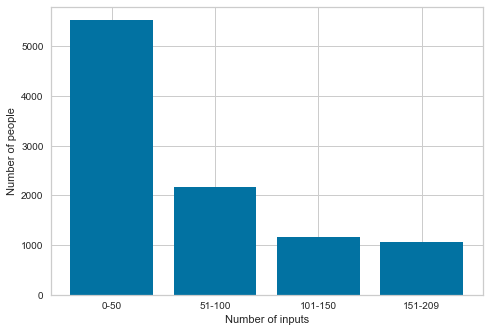

In [68]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ranges = ['0-50', '51-100', '101-150', '151-209']
plt.xlabel("Number of inputs")
plt.ylabel("Number of people")
ax.bar(ranges,y)
plt.show()

მოცემულ გრაფიკზე, x ღერძი წარმოადგენს, თუ კონკრეტულ ადამიანს რამდენი დღე შეყავდა მონაცემები. აშკარაა და ლოგიკურიცაა რომ 9000 მონაცემიდან 5000-ზე მეტმა ადამიანმა 2 თვეც კი არ გამოიყენა აპლიკაცია. დანარჩენები კი შედარებით თანაბრად არიან გადანაწილებულები. შესაძლოა მოცემული ინფორმაცია დაგვეხმაროს იმაში, რომ გამოვყოთ აქტიური, ერთგული მომხმარებლები იმათგან, ვინც უბრალოდ "გავლით" არის.



ახლა კი ჩავეძიოთ Input სვეტს და განვიხილოთ მისი ერთ-ერთი შემცველი ნაწილი, meal-ების რაოდენობა დღეში როგორ არის განაწილებული. ეს ინფორმაცია შესაძლოა დაგვეხმაროს რამე კავშირის დაჭერაში ახალ-ძველ მომხმარებლებს შორის. ასევე შევამოწმოთ გვაქვს თუ არა გამოტოვებული მნიშვნელობები, არაზუსტი მონაცემები, აუთლაიერები ...

In [69]:
meals_distribution ={}
p_range = {}
p_meals = {}
for person in unique_people:
    mask = data.Person == person
    person_meals = set()
    person_data = data.loc[mask, ['Person']]
    for i in person_data.index:
        curr = get_meals(data, i)
        person_meals = set.union(person_meals, curr)
    n = len(person_meals)
    
    # რომელი საკვები რამდენჯერ გვხვდება
    if n in meals_distribution:
        meals_distribution[n] += 1
    else:
        meals_distribution[n] = 1
        
    # კონკრეტულმა ადამიანმა რამდენი განსხვავებული meal შეიყვანა და თითოეულმა ადამიანმა რამდენი მონაცემი შეიყვანა
    p_meals[person] = len(person_meals)
    p_range[person] = get_range(person_data.shape[0])

In [70]:
p_meals[1]

1

In [71]:
%matplotlib inline

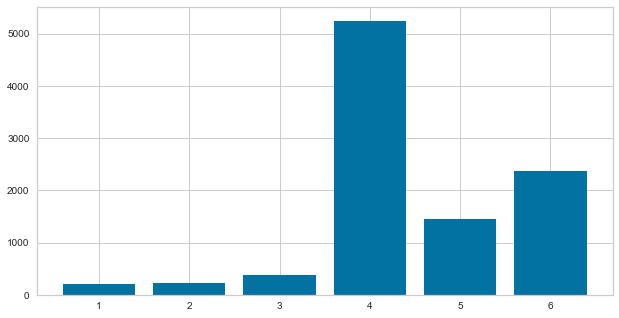

In [72]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(list(meals_distribution.keys()),list(meals_distribution.values()))
plt.show()

In [73]:
pp_meals = []
pp_range = []
for person in unique_people:
    pp_meals.append(p_meals[person])
    pp_range.append(p_range[person])
pre_data = {'persons' : unique_people, 'meals_num' : pp_meals, 'range' : pp_range}
corr_data = pd.DataFrame(data=pre_data)
corr_data.corr()

,persons,meals_num,range
persons,1.000000,0.005707,-0.001040
meals_num,0.005707,1.000000,0.222537
range,-0.001040,0.222537,1.000000


მოცემული დიაგრამის საშუალებით ჩანს, რომ მინიმალური meal-ების რაოდენობა კონკრეტული ადამიანისთვის არის 1, ხოლო მაქსიმუმი 6.
საინტერესოა ფაქტი, რომ 4-ზე ნაკლები ძალიან ცოტას შეყავს. ასევე შესამჩნევია რომ თანაბრადაც არ არის განაწილებული და საკმაოდ დიდი სხვაობებია მნიშვნელობებს შორის.
ვფიქრობდით, რომ meal-ების არალოგიკური რაოდენობის განაწილება ბევრად დიდი იქნებოდა, რადგან ახალ მომხმარებელს თავიდან შესაძლოა გაჭირვებოდა ნავიგაცია და meal-ებში არალოგიკური რაღაც ქონოდა ჩაწერილი, ან მთელი დღისა და მოხმარების პროცესში სულ ერთიდაიგივეს იყენებდა. თუმცა არც დიაგრამა და არც კორელაციის მატრიცი ამაზე არ მეტყველებს. მოცემული სურათი მაინც ლოგიკურად ასახავს რეალურ სიტუაციას და მეტყველებს რაღაც ფაქტებზე. მაგალითად წინა დიაგრამაში ვნახეთ რომ 5000-ზე მეტი ადამიანი იყო ისეთი, ვისაც დიდი ხანი არ გამოუყენებია აპლიკაცია (ადამიანები რომლებმაც მოკლე დროში დაანებეს მის გამოყენებას თავი). მოდი პირობითად ვუწოდოთ მათ "დამწყებები". ფაქტი, რომ meal რაოდენობა არ არის 1-2-3-ის მნიშვნელობები არის ძალიან ცოტა მეტყველებს იმაზე, რომ დამწყებები მარტივად ადაპტირდებიან აპლიკაციასთან და მათთვის არ არის პრობლემა სწორი რაოდენობით meal-ების შეყვანა, რადგან მაგალითად 1 საკმაოდ დამაეჭვებელია.

ახლა განაწილება ვნახოთ კონკრეტულ დღეს რამდენ ადამიანს შეყავდა მონაცემები.

In [74]:
unique_dates = data.iloc[:, 1].unique()
unique_dates.sort()
date_people = {}
sm = 0
for date in unique_dates:
    mask = data.Date == date
    sz = data.loc[mask, :].shape[0]
    date_people[date] = sz
    sm += sz
print(sm)

587186


In [75]:
%matplotlib inline

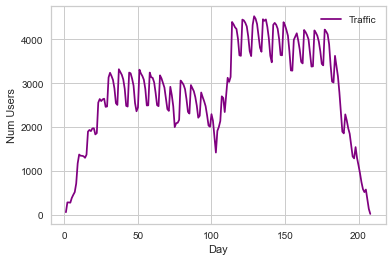

In [76]:
bla = [i for i in unique_dates]
blu = [date_people[i] for i in unique_dates]
plt.plot([i for i in range(1, 209)], blu, color='purple', label='Traffic')
plt.ylabel('Num Users')
plt.xlabel('Day')
plt.legend()
plt.show()

მივიღეთ საკმაოდ საინტერესო შედეგი. აშკარად ჩანს კანონზომიერება დღეებს შორის. მაგრამ საჭიროა დავაკვირდეთ რამდენიმე საინტერესო ფაქტს:
- მონაცემების რაოდენობა თავიდან საეჭვოდ სწრაფად იზრდება, ბოლოს კი ზედმეტად სწრაფად და მოულოდნელად მცირდება. ერთი შეხედვით შესაძლოა ვიფიქროთ, რომ უბრალოდ მონაცემები გვაკლია საწყისი და ბოლო დღეებისთვის. თუმცა აუცილებელია გავამახვილოთ ყურადღება იმაზეც, რომ კანონზომიერებას, აქვს პარაბოლის ფორმა, რაც სეზონურობის ნიშანია,  რომ კონკრეტულ მონაკვეთებში სტაციონალურსაც კი გავს. იმის თქმა მინდა, რომ იმ დაბალანსებულ მონაკვეთებში, როცა დღეებს შორის აშკარა კავშირი იგრძნობა, დამოკიდებულება არის შემდეგი: ჯერ იზრდება, აღწევს პიკს და ისევ დაბლა ეშვება. ანალოგიური რაღა ხდება თავშიც და ბოლოშიც, იმ ნაწილებში, სადაც თითქოს მონაცემები უნდა აკლდეს... ამის გათვალისწინებით ასე თვალდაუხუჭავად ამ მონაცემების გადაყრა არ გამოდგება მაგრამ სტაციოალურობის პირობას აშკარად არღვევს და თუ ფრედიქშენი დაგვჭირდა time series-ზე საჭიროა რამე მოვიმოქმედოთ :)
- სადღაც მე-100 დღეს არის ჩავარდნა, შემდეგ კი საკმაოდ დიდი აღმასვლა. ამის შესაძლოა რამდენიმე მიზეზი ქონდეს.ახლა კი თავს უფლებას მივცემთ გაგიზიაროთ ჩვენი აზრიც: მოცემული დღე არის 25 დეკემბერი (შობა) რაც ალბათ დაგვეთანხმებით, რომ ერთ-ერთი ყველაზე პოპულარული და მნიშვნელოვანი დღესასწაულია ბევრისთვის. ამიტომ, ლოგიკური ჩანს, რომ ამ კონკრეტულ დღეს აპლიკაციისთვის ბევრს აღარ ეცალა, ხოლო იმ უქმეების შემდეგ რაც მას მოსდევს, აშკარად ბევრმა ადამიანმა გადაწყვიტა გაეკონტროლებინა კვების რაციონი...

In [77]:
dates = []
for date in unique_dates:
    dates.append(int(date[len(date) - 2:]))
missing = 0
for i in range(1, len(dates)):
    if dates[i - 1] > dates[i]:
        if dates[i] != 1:
            missing += 1
missing

0

მოცემული გვაქვს 208 დღიანი მონაკვეთი, სადაც გამოტოვებული დღეები არ არის.

In [78]:
nutritions = {}
count_nutritions = {}
missmatched = []
negatives = []
for i in data.index:
    curr = get_nutritions(data, i)
    if is_missmatched(data, i):
        missmatched.append(i)
    if is_negative(data, i):
        negatives.append(i)
        
    for nutrition in curr:
        if nutrition not in count_nutritions:
            count_nutritions[nutrition]=1
        else:
            count_nutritions[nutrition]+=1
    nutritions = set.union(curr, nutritions)

In [79]:
%matplotlib inline

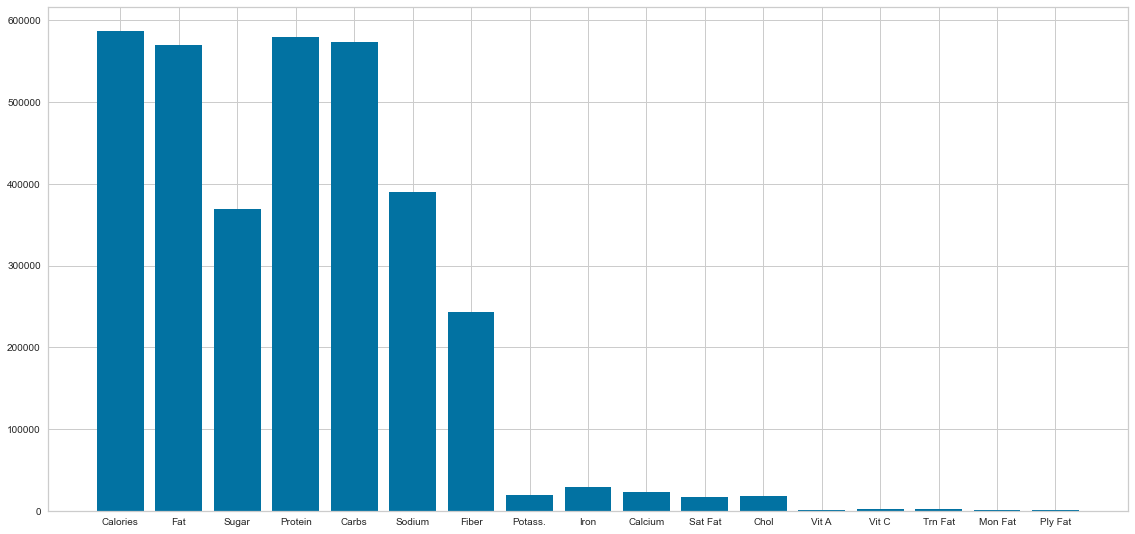

In [80]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0,0,1,1])
ax.bar(list(count_nutritions.keys()),list(count_nutritions.values()))
plt.show()

In [81]:
count_nutritions

{'Calories': 587186,
 'Fat': 569334,
 'Sugar': 368917,
 'Protein': 579872,
 'Carbs': 573048,
 'Sodium': 390527,
 'Fiber': 242840,
 'Potass.': 19416,
 'Iron': 29016,
 'Calcium': 22925,
 'Sat Fat': 16576,
 'Chol': 18252,
 'Vit A': 774,
 'Vit C': 2486,
 'Trn Fat': 1828,
 'Mon Fat': 428,
 'Ply Fat': 761}

მოცემული ჩარტი გვიჩვენებს თუ კონკრეტულ დღეს რომელი ნუტრიოტი რამდენჯერ გამოიყენეს.
სულ გვაქვს 17 ნუტრიოტი, რომელთაგან 7 არის ხშირად გამოყენებადი, დანარჩენები კი სხვებთან შედარებით ძალიან იშვიათად გვხვდება. ცხადია, 29000 არ არის ცოტა, მაგრამ ნამდვილად ცოტაა 600 000-თან შედარებით. ამიტომ საჭიროა დავფიქრდეთ, იქნება თუ არა საჭირო მათი გამოყენება. ასევე აღსანიშნავია ფაქტი, რომ არცერთ მომხმარებელს 6-ზე მეტი ნუტრიოტი შეყვანილი არ ყავს. 

In [82]:
nutritions_distribution = {}
for person in unique_people:
    person_nutritions = get_person_nutritions(data, person)
    for nutrition in person_nutritions:
        if nutrition not in nutritions_distribution:
            nutritions_distribution[nutrition] = 1
        else:
            nutritions_distribution[nutrition] += 1

In [83]:
%matplotlib inline

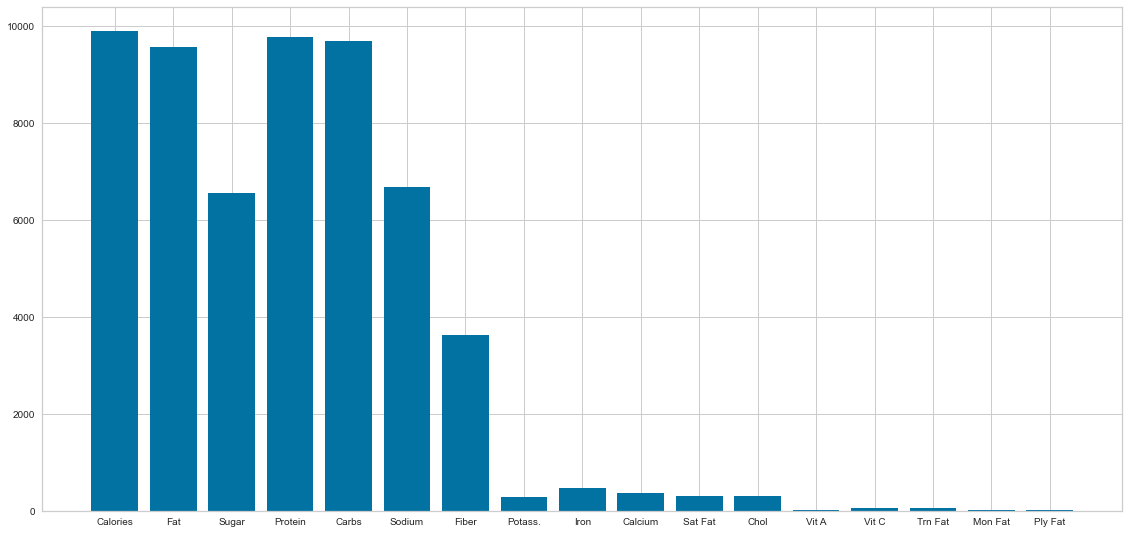

In [84]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0,0,1,1])
ax.bar(list(nutritions_distribution.keys()),list(nutritions_distribution.values()))
plt.show()

In [85]:
nutritions_distribution

{'Calories': 9896,
 'Fat': 9569,
 'Sugar': 6543,
 'Protein': 9760,
 'Carbs': 9684,
 'Sodium': 6676,
 'Fiber': 3629,
 'Potass.': 287,
 'Iron': 474,
 'Calcium': 372,
 'Sat Fat': 296,
 'Chol': 310,
 'Vit A': 20,
 'Vit C': 49,
 'Trn Fat': 48,
 'Mon Fat': 12,
 'Ply Fat': 14}

მოცემული ჩარტი წინას ისე გავს, შესაძლოა თავიდან რომ შევხედავთ ვერც კი გავიგოთ რა განსხვავებაა ამასა და წინა-ს შორის. საქმე იმაშია, რომ განაწილება თითქმის ერთნაირია,მაგრამ მათ შორის განსხვავება არის ის, რომ პირველი აღნიშნავდა კონკრეტული ნუტრიოტი სულ რამდენჯერ იქნა გამოყენებული, ეს კი გვიჩვენებს კონკრეტული ნუტრიოტი რამდენმა ადამიანმა გამოიყენა. ამის ფონზე რკინის 29000 იანი მაჩვენებელი კიდევ უფრო შემცირდა, რადგან თითქმის 10000 ადამიანიდან მხოლოდ 400-ს შეყავდა რკინა, რომელიც დანარჩენ მცირერიცხოვნებს შორის "ლიდერი" არის. ამის გათვალისწინებით, შესაძლოა ვიფიქროთ მეხსიერების, რესურსისა და დროის დაზოგვის მიზნით ისინი აუცილებლობის არსებობის გარეშე, არ გამოვიყენოთ მომავალში ცვლადებად.

მონაცემების გასუფთავება/შესწორება
-

In [86]:
len(missmatched)

918

In [87]:
len(negatives)

1399

In [88]:
duplicated = []
anomalies = []
for i in missmatched:
    nutrs = get_nutritions(data, i)
    curr = 0
    for nutr in nutrs:
        if get_total_nutrition(data, i, nutr) != None:
            if (get_total_nutrition(data, i, nutr) * 2 == get_nutritions_sum(data, i, nutr)[0]): 
                curr = 1
            elif get_total_nutrition(data,i, nutr) != get_nutritions_sum(data, i, nutr)[0]:
                curr = 0
                break
            else:
                anomalies.append(i)
                curr = 0
                break
    if curr == 1:
        duplicated.append(i)
len(duplicated)

877

In [89]:
len(anomalies)

15

ვეცადეთ მოგვეძებნა დეტალები, რომლებიც შესაძლოა აფუჭებდნენ საქმეს და მივაგენით რომ:
- ზოგი ნუტრიოტის მნიშვნელობა არის უარყოფითი რიცხვი. ზოგან ეს ტექნიკური შეცდომითაა, ზოგან კი სპეციალურად (breastfeeding). 
- დავწერეთ დამხმარე ფუნქცია, რომელიც უშუალოდ Input ველში კრებს ნუტრიოტებს და ადარებს მნიშვნელობას, რომელიც ტოტალში წერია. წესით ისინი ტოლები უნდა იყონ, მაგრამ 918 შემთხვევაში ეს ასე არ ხდება და გვაქვს აცდენა. 918 ცხადია პატარა რიცხვია და შეგვიძლია მისი გადაგდება მაგრამ ასე არ მოვიქეცით ერთი მიზეზის გამო: 918 დან 877 შემთხვევაში ეს აცდენა გამოიწვია იმან, რომ Input ში მოწოდებული გვაქვს გამეორებული ინფორმაცია, რასაც ადასტურებს sequence-ც და აბსოლიტურად ზუსტი კოპიოები თითოეული meal-ისა და dish-ის. ეს ნიშნავს, რომ ტოტალი ორჯერ ნაკლები უნდა იყოს იქიდან მირებულ ჯამზე და მართლაც ასეა. ანუ Input ის ინფორმაცია რომ გავანახევროთ მოცემული ინდექსებისთვის ყველაფერი მწყობრში ჩადგება. ასევე კარგი აზრია დავპლოტოთ ის დღეები სადაც ეს შეცდომა (დუბლირება) გაიპარა, რადგან არსებობს რისკი, რომ აპლიკაცია რაღაც შემთხვევაში იბაგება და არასწორ ინფორმაციას გვაწვდის, ამ შემთხვევაში ეს ბაგი აუცილებლად გასასწორებელი იქნება, რადგან არვიცით რას გამოიწვევს, კარგს რომ არაფერს, მაგაზე ყველანი ვთანხმდებით :) ასევე სრულებით შესაძლებელია რამდენიმე ერთეული იუზერის გამო ხდებოდეს ეს ყველაფერი. ამ შემთხვევაში ვერაფერს გავხდებით. 
- საბოლოოდ, დადგინდა, რომ მხოლოდ 14 ისეთი ინდექსი გვაქ სადაც დამთხვევა არ ხდება Input ის ნუტრიოტების ჯამისა და total-ის. ამიტომ ისინი დაუფიქრებლად გადავყაროთ :)

ახალი ცხრილების შედგენა
-

თავიდანვე ჩანდა და ახლაც კარგად გამოჩნდა, რომ პროექტზე მუშაობის წაყვანა შესაძლებელია ორი მიმართულებით. 
- იუზერის ანალიზი -> ფრედიქშენი მის დიეტაზე, რეკომენდაცია
- დღის ანალიზი -> დღეებს შორის კავშირის დადგენაზე, წინასწარმეტყველება მომავლის ინფორმაციაზე

ამ ყველაფრის გათვალისწინებით, გადავწყვიტეთ აგვეგო ორი ცხრილი, ერთი იუზერების კლასტერიზაციისთვის, ხოლო მეორე დღების კლასტერიზაციისთვის. ვნახოთ რა შედეგს მოგვცემს თითოეული მათგანი და ავარჩიოთ და შევქმნათ ცვლადები, რომელიც დაგვეხმარებიან კლასტერიზაციაში.

დღის ჭრილში ანალიზი, ცხრილის შექმნა
-

როგორც უკვე აღვნიშნეთ, პირველი 7 ნუტრიოტის გარდა, დიდი საჭიროება თუ არ იქნება სჯობს ავერიდოთ ბოლო 9 ნუტრიოტს (ვსაუბრობ ნუტრიოტების რაოდენობების განაწილების ჩარტზე). 

- nutrition_avg_sum -> დღეების ანალიზში შესაძლოა ქონდეს მნიშვნელობა, კონკრეტულ დღეს საშუალოდ რამდენ ნუტრიოტს იღებს მომხმარებელი. ამით შესაძლოა მივწვდეთ და დავადგინოთ მაგალითად დღესასწაულები (წესით ამ დროს საშუალო მეტი უნდა იყოს ხოლმე). ამავდროულად, არ ვკარგავთ ინფორმაციას ნუტრიოტების შესახებ 
- unique_users -> იმ მომხმრებელთა რაოდენობა კონკრეტულ დღეს, რომლებმაც გამოიყენეს და მონაცემები შეიყვანეს აპლიკაციაში. ეს შესაძლოა იყოს ერთ-ერთი ყველაზე მნიშვნელოვანი ფიჩერი, იმის მიუხედავად რის გაკეთებას გადავწყვეტთ დღის ანალიზის მიხედვით.
- nutrition_avg_diff -> ამ დღისთვის, რამდენი იყო აცდენა goal-სა და total-ს შორის. შეგვიძლია გამოვიყენოთ იგივე მიზნებით, რისტვისაც ვქმნით პირველ ცვლადს
- unique_dates -> დღე, რომელზეც გვაქვს ინფორმაცია. შეგვიძლია დავაყენოთ ინდექსადაც :)

In [90]:
date_avg_nutritions = []
for date in unique_dates:
    date_avg_nutritions.append(get_daily_average_nutritions(data, date, anomalies))

In [91]:
date_avg_difference = []
for date in unique_dates:
    date_avg_difference.append(get_daily_average_difference(data, date, anomalies))

In [92]:
dictionary = {'unique_dates' : unique_dates, 'unique_users' : [date_people[i] for i in unique_dates]}
dictionary['unique_meals'] = [get_daily_meals_num(data, date) for date in unique_dates]
our_nutritions = ['Protein', 'Calories', 'Sodium', 'Sugar', 'Fat', 'Carbs', 'Fiber']
for nutrition in our_nutritions:
    indx = nutrition + '_average_sum'
    dictionary[indx] = [dic[nutrition] for dic in date_avg_nutritions]
for nutrition in our_nutritions:
    indx = nutrition + '_average_dif'
    dictionary[indx] = [dic[nutrition] for dic in date_avg_difference]

In [93]:
daysta = pd.DataFrame(data=dictionary)
daysta.to_csv('daily_data.csv')

მომხმარებლის ანალიზი, ცხრილის შექმნა
-

- avg_proportions_diff -> nutrition science-ის ერთ-ერთი უმარტივესი ფორმულა არის: calories = 4 * proteins + 4 * carbs + 9 * fat. ეს შესაძლოა გამოგვადგეს იმის დასადგენად, რამდენად სწორად იკვებებიან მომხმარებლები და რამდენად სწორად შეყავთ მონაცემები. ახალბედებს დიდი ალბათობით ეს შეეშლებათ, დრო და დრო კი ისწავლიან და ცდომილება ფორმულის შედეგთან და actual შედეგთან პატარა იქნება. ამის ფონზე, ურიგო არ იქნება ცვლადის შექმნა, რომელიც კონკრეტული იუზერისთვის გვეტყვის საშუალოდ რამდენიც ცდება მოცემულ ფორმულას მისი შეყვანილი მონაცემები.თავიდან მოცემულ ფორმულას სკეპტიკურად ვუყურებდით, მაგრამ შემდეგ ჩავატარეთ ექსპერიმენტი და გოლში ძალიან ხშირ შემთხვევაში სრულდებოდა. შედარებით ნაკლებად, მაგრამ მაინც საკმაოდ წარმატებით სრულდება ჩვენი მომხმარებლების total-ის მონაცემებზეც. წარმატებით შესრულებას ვეძახით 100 მდე ცდომილებას. ქვემოთ მოცემული ჩარტი კარგად აჩვენებს მას. 250 მკაცრად მცირდება, შემდეგ კი იმატებს. ცხადია ეს გამოწვეულია იმით, რომ თავიდან ბევრმა არ იცის მონაცემების კარგად შეყვანა. მოკლედ, ეს ცვლადი საკმაოდ საინტერესო ჩანს და წესით კარგი გამყოფი უნდა იყოს გამოცდილი და გამოუცდელი მომხმარებლების
- unique_foods -> რაც არ უნდა გასაკვირი იყოს, ამდენი მონაცემი გვაქვს, მაგრამ მიუხედავად ამისა მაინც შეგვიძლია დავადგინოთ განსხვავებული საჭმელების რაოდენობა. ერთჯერადად გამოვიყენეთ ფუნქცია და რაოდენობა დაახლოებით 1 500 000 იყო. ამის ფონზე, ვიფიქრეთ შეიძლებოდა მისი ფიჩერად გამოყენებაც თითოეული მომხმარებლისთვის. ეს ცვლადი შესაძლოა ძალიან ბევრის მთქმელი არაა, მაგრამ მაინც არის შესაძლებელი გამოგვადგეს და დაგვეხმაროს იუზერების დახარისხებისას.
- input_number -> იგივეს ვერ ვიტყვით ამ ფიჩერზე, რადგან ის საკმაოდ მნიშვნელოვან როლს შეიტანს იმაში, რომ დავადგინოთ მომხმარებლის "სიახლოვე" აპლიკაციასთან. გვგონია, რომ კლასტერიზაციაში ის უმნიშვნელოვანეს როლს ითამაშებს.
- avg_(positive/negtive/none) difference -> ეს ცვლადი შედარებით განსხვავებულია სხვებთან შედარებით, არ არის სტანდარტული. ეს გამოიხატება იმაში, რომ აღნიშნავს, კონკრეტული ნუტრიოტის შემთხვევაში რამდენჯერ გადაცდა/ჩამორჩა/ზუსტად_დასვა/საერთოდ არ გამოიყენა ნუტრიოტი. ამით შეგვიძლია დავიჭიროთ ის, თუ რამდენად კარგად ასრულებს ხოლმე თავის ვალდებულებას და რამდენად ვითარდება. თეორიულად, შესაძლებელია გავიდეთ იმაზეც დაკლება სურს თუ მომატება. ამის საშუალებით კი მერე განვსაზღვრავთ თუ დაახლოებით რა მიზნებისთვის იყენებენ აპლიკაციას და ვინ წარმოადგენს ძირითად ნაწილს მომხმარებლებისას.
- nutrition_avg -> გვიჩვენებს საშუალოდ რამდენს იღებს მომხმარებელი (კონკრეტულ ნუტრიოტს)
- dates_list -> ორივე ცხრილის კლასტერიზაციის შემდეგ, დაგვჭირდა მათი დაკავშირება ერთმანეთთან. ამისთვის გავაკეთეთ ეს ველი, რომელშიც ვინახავთ ლისტს json-ად, კონკრეტული მომხმარებელი რა დღეებში სარგებლობდა ამ აპლიკაციით

FAIL! საშუალოსთან ერთად, ორივე ცხრილში გვქონდა მინიმუმები და მაქსიმუმები, თუმცა კლასტერიზაციის დროს ზუსტად ისეთი განაწილება ქონდათ ორივეგან, როგორც საშუალოს, ამიტომ გადავწყვიტეთ მათი ამოგდება. საშუალოს ჩასმა კი იმიტომ არის კარგი, რომ კონკრეტული ნუტრიოტების შესახებ რაოდენობრივ ინფორმაციას არ ვკარგავთ. ეგეც რომ ამოვაგდოთ, უშუალოდ რომელი მომხმარებელი დაახლოებით რამდენ კალორიას იღებს, მაგალითად ეგ ფაქტობრივად აღარ გვეცოდინებოდა. ახლა დაახლოებით მაინც გვექნება წარმოდგენა საშუალოს საშუალებით )

In [94]:
def get_range2(num):
    if num <= 50 and num != 0:
        return 0
    elif num <= 100:
        return 1
    elif num <= 150:
        return 2
    elif num <= 200:
        return 3
    elif num <= 250:
        return 4
    elif num <= 500:
        return 5
    else:
        return 6

In [95]:
nutritions_dif = [0, 0, 0, 0, 0, 0, 0]
for row in data.index:
    rang = get_range2(check_proportions(data, row))
    nutritions_dif[rang] += 1

In [96]:
%matplotlib inline

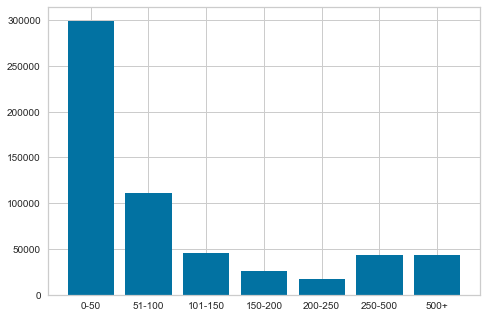

In [97]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ranges = ['0-50', '51-100', '101-150', '150-200', '200-250', '250-500', '500+']
ax.bar(ranges, nutritions_dif)
plt.show()

In [98]:
people_data = {}
unique_foods = []
input_number = []
avg_daily_food = []
avg_diff_from_formula = []

for person in unique_people:
    unique_foods.append(get_persons_unique_foods(data, person))
    input_number.append(data.loc[data.Person == person, ['Date']].shape[0])
    avg_daily_food.append(unique_foods[len(unique_foods) - 1] / input_number[len(input_number) - 1])
    avg_diff_from_formula.append(person_avg_formula_diff(data, person, anomalies))
    
people_data['unique_foods'] = unique_foods
people_data['input_number'] = input_number
people_data['avg_daily_food'] = avg_daily_food 
people_data['avg_proportions_diff'] = avg_diff_from_formula

In [99]:
def get_dates_list(data, person):
    df = data.loc[data.Person == person,['Date']]
    return df.iloc[:, 0].unique()
dates_list = []
for person in unique_people:
    dates_list.append(json.dumps(get_dates_list(data, person).tolist()))
people_data['dates_list'] = dates_list

In [100]:
positive_difference = {}
negative_difference = {}
none_difference = {}
for person in unique_people:
    for nutrition in our_nutritions:
        difference = get_nutrition_difference(data, person, nutrition, anomalies)
        if nutrition not in positive_difference:
            positive_difference[nutrition] = []
            negative_difference[nutrition] = []
            none_difference[nutrition] = []
        positive_difference[nutrition].append(difference[0])
        negative_difference[nutrition].append(difference[1])
        none_difference[nutrition].append(difference[2])
for nutrition in our_nutritions:
    positive_nutrition = nutrition + '_positive' + '_difference'
    people_data[positive_nutrition] = positive_difference[nutrition]
    negative_nutrition = nutrition + '_negative' + '_difference'
    people_data[negative_nutrition] = negative_difference[nutrition]
    none_nutrition = nutrition + '_none' + '_difference'
    people_data[none_nutrition] = none_difference[nutrition]

In [101]:
nutrition_avg_val = {}
for person in unique_people:
    for nutrition in our_nutritions:
        avg = avg_nutrition(data, person, nutrition, anomalies)
        if nutrition not in nutrition_avg_val:
            nutrition_avg_val[nutrition] = []
        nutrition_avg_val[nutrition].append(avg)
for nutrition in our_nutritions:
    nutrition_avg = nutrition + '_avg'
    people_data[nutrition_avg] = nutrition_avg_val[nutrition]

In [102]:
people_dataframe = pd.DataFrame(data=people_data)
people_dataframe.to_csv('people_data.csv')

მომხმარებლების კლასტერიზაცია
-

მომხმარებლებისთვის შექმნილი data-ს ფიჩერებზე უკვე საკმაოდ ვისაუბრეთ. ჩამოვტვირთოთ ეს მონაცემები და დავაკვირდეთ როგორ არიან განაწილებული.

In [143]:
data = pd.read_csv('people_data.csv')
data = data[data.columns[data.columns != 'Unnamed: 0']]

In [144]:
data.head(5)

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,dates_list,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,...,Fiber_positive_difference,Fiber_negative_difference,Fiber_none_difference,Protein_avg,Calories_avg,Sodium_avg,Sugar_avg,Fat_avg,Carbs_avg,Fiber_avg
0,255,173,1.473988,443.271676,"[""2014-09-15"", ""2014-09-16"", ""2014-09-17"", ""20...",45,127,1,57,116,...,0,0,173,128.450867,2305.352601,2062.595376,81.606936,77.734104,184.537572,0.000000
1,251,60,4.183333,190.550000,"[""2015-01-12"", ""2015-01-13"", ""2015-01-14"", ""20...",59,1,0,36,24,...,0,0,60,42.500000,1457.166667,1670.283333,76.216667,42.283333,181.200000,0.000000
2,38,7,5.428571,718.571429,"[""2014-09-14"", ""2014-09-15"", ""2014-09-16"", ""20...",5,2,0,3,4,...,5,2,0,46.142857,1709.857143,1450.857143,0.000000,38.142857,115.857143,17.142857
3,157,27,5.814815,72.481481,"[""2014-10-21"", ""2014-10-22"", ""2014-11-13"", ""20...",25,2,0,25,2,...,0,0,27,42.703704,912.444444,1483.740741,0.000000,37.074074,99.333333,0.000000
4,245,179,1.368715,1549.659218,"[""2014-09-14"", ""2014-09-15"", ""2014-09-16"", ""20...",105,73,1,134,45,...,141,29,9,188.379888,2997.938547,2003.910615,121.268156,77.195531,0.000000,35.223464


In [145]:
data.describe()

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,Calories_none_difference,...,Fiber_positive_difference,Fiber_negative_difference,Fiber_none_difference,Protein_avg,Calories_avg,Sodium_avg,Sugar_avg,Fat_avg,Carbs_avg,Fiber_avg
count,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,...,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000
mean,286.681993,59.335691,5.202374,172.582329,47.436742,10.675728,1.223222,46.259499,12.877627,0.198565,...,20.133892,3.999798,35.202001,64.573537,1314.676358,1268.971644,31.298231,46.688729,132.642764,6.102309
std,298.370319,54.571850,2.287778,3443.970487,46.110159,18.308679,8.822074,43.795030,21.017322,1.408801,...,39.927587,14.144394,48.936809,33.940614,5338.760979,9694.441291,98.284859,29.028800,476.762583,31.467629
min,1.000000,1.000000,0.061224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,13.000000,3.666667,48.695833,10.000000,0.000000,0.000000,11.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,45.250000,980.936785,0.000000,0.000000,32.508222,90.000000,0.000000
50%,190.500000,42.000000,4.926972,80.617819,32.000000,3.000000,0.000000,32.000000,4.000000,0.000000,...,0.000000,0.000000,9.000000,60.000000,1235.774849,1245.392857,29.154014,44.731238,127.341061,0.000000
75%,410.000000,92.000000,6.359022,134.026817,74.000000,13.000000,1.000000,70.000000,16.000000,0.000000,...,19.000000,0.000000,54.000000,78.350909,1500.133041,1915.116205,49.166667,58.086413,162.077197,11.501404
max,2938.000000,187.000000,30.000000,342000.000000,180.000000,182.000000,180.000000,186.000000,162.000000,64.000000,...,185.000000,179.000000,186.000000,875.837838,530000.000000,960000.000000,9000.000000,1605.552941,47000.000000,3000.000000


In [146]:
def boxplots(data):
    fig, axes = plt.subplots(4, 8, figsize=(20, 20))
    i = 0
    j = 0
    for feature in data.columns.values:
        if feature == 'dates_list':
            continue
        sns.boxplot(ax=axes[i, j], x=data[feature])
        if j == 7:
            j = 0
            i += 1
        else:
            j += 1

In [147]:
%matplotlib inline

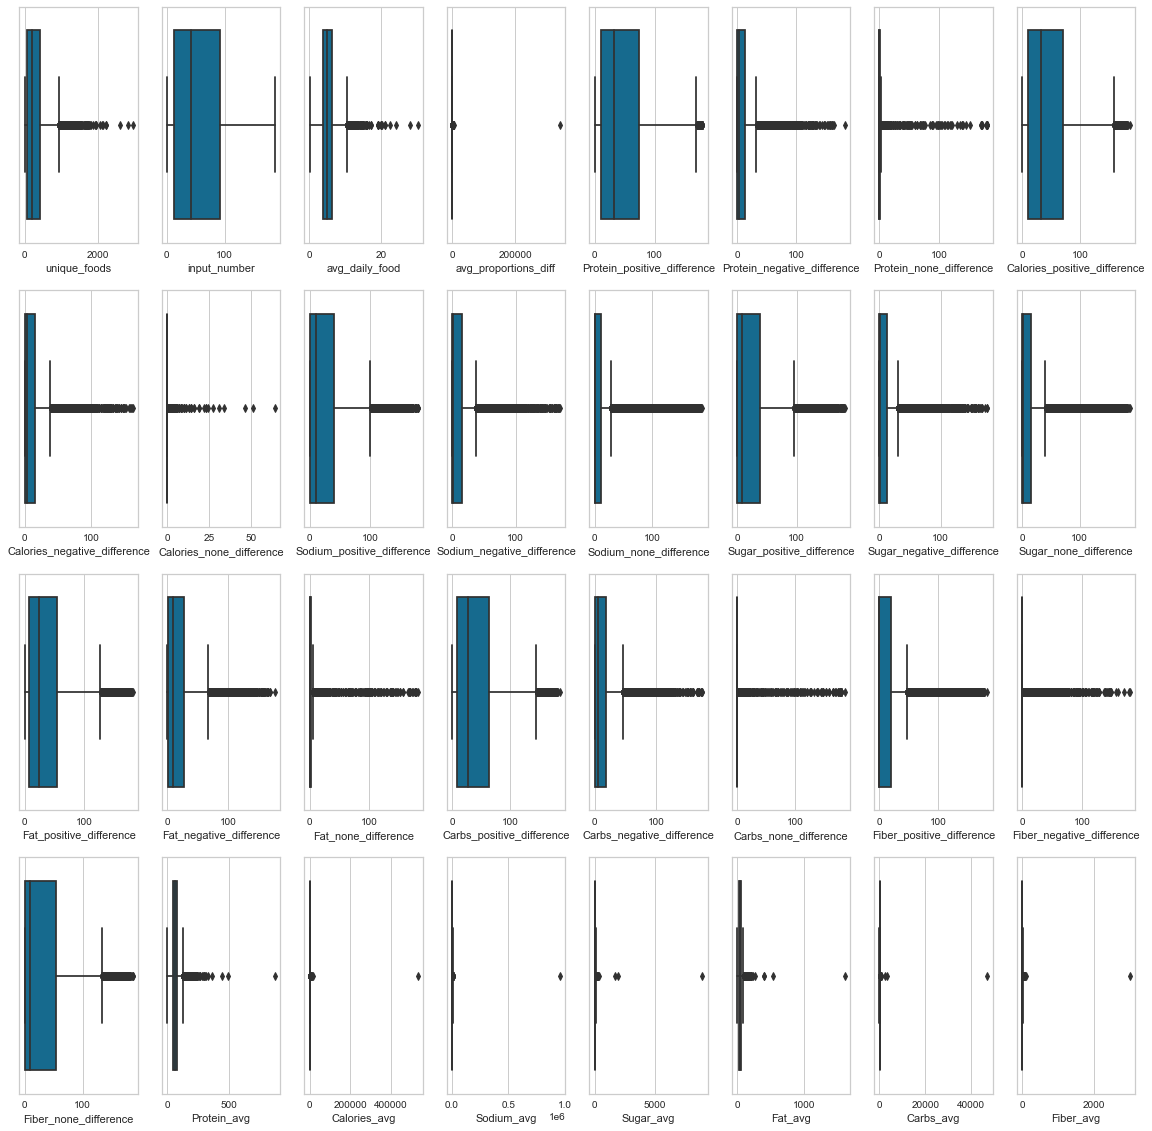

In [148]:
boxplots(data)

boxplot-ებიდან ბევრი რამის დანახვა შეგვიძლია. ისინი აჩვენებენ რა შუალედშია მოთავსებული მონაცემების 25, 50, 75% და ასევე შეგვიძლია დავინახოთ მონაცემების დაახლოებით 95%-ის შესაბამისი შუალედი, ხოლო ის წერტილები, რომლებიც გარეთაა მოქცეული, შეგვიძლია აუთლაიერებად ჩავთვალოთ. ამ ფიჩერების მიხედვით გაკეთებულ ბოქსპლოტებში ბევრგან ჩანს ამოვარდნა, მაგრამ ჩვენ გადავწყვიტეთ, რომ პირდაპირ ყველა ასეთი აუთლაიერის ჩანაცვლება არასწორი იქნება, რადგან შეიძლება მათი წილი 10%ც იყოს, რაც მონაცემების საკმაოდ დიდი რაოდენობაა, ამიტომ ჩავანაცვლოთ მხოლოდ ისეთი მონაცემები, რომლებიც "ანომალიურად" გვეჩვენება, ანუ აუთლაიერებშიც კი ცალკე არის გამოყოფილი. ეს ლოგიკურიც არის ძირითადად, რადგან მაგალითად avg_proportions_diff ის შემთხვევაში ვხედავთ, რომ 0-1000 შუალედშია მოთავსებული მონაცემების ძალიან დიდი ნაწილი და ამასთან ერთად გვაქვს 200000 ზე დიდი მონაცემებიც, რომლებიც აუცილებლად ამოსაგდებია. ასეთი შესაცვლელი ფიჩერებისთვის ის მნიშვნელობები, რომლებსაც ამოვარდნილად ვთვლით, ჩავანაცვლოთ მედიანით, რადგან ამ მონაცემების დიდ ნაწილში საშუალო მნიშვნელობა რეალობისგან საკმაოდ გადახრილი იქნება. ბოქსპლოტებს თუ დავაკვირდებით, ბევრგან არის, რომ მონაცემების დიდი ნაწილი რაღაც პატარა შუალედშია, და აუთლაიერები დიდი რიცხვებია საკმაოდ, ამიტომ გადავწყვიტეთ მედიანის გამოყენება ჩასანაცვლებლად.

In [149]:
dic = {'unique_foods' : 2500, 'avg_daily_food' : 20, 'avg_proportions_diff' : 1000, 'Protein_avg' : 150, 
       'Calories_avg' : 8000, 'Sodium_avg' : 4800, 'Sugar_avg' : 1000, 'Fat_avg': 250, 'Carbs_avg' : 400,  'Fiber_avg' : 50}

In [150]:
for column in data.columns.values:
    if column not in dic:
        continue
    df = data.loc[:, [column]]
    for i in df.index:
        if df.iloc[i, 0] >= dic[column]:
            data.loc[i, [column]] = data[column].median()

In [151]:
data.head(1)

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,dates_list,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,...,Fiber_positive_difference,Fiber_negative_difference,Fiber_none_difference,Protein_avg,Calories_avg,Sodium_avg,Sugar_avg,Fat_avg,Carbs_avg,Fiber_avg
0,255.0,173,1.473988,443.271676,"[""2014-09-15"", ""2014-09-16"", ""2014-09-17"", ""20...",45,127,1,57,116,...,0,0,173,128.450867,2305.352601,2062.595376,81.606936,77.734104,184.537572,0.0


ახლა დავასკალიროთ მონაცემები და შემდეგ დავიწყოთ კლასტერიზაციის პროცესი.

In [152]:
cols = []
for col in data.columns:
    if col != 'dates_list':
        cols.append(col)
dates = data.loc[:, ['dates_list']]
data = data.loc[:, cols]
data = data / data.max()
initial_data = data.copy()
data = data.iloc[:, :25]

In [153]:
data.head()

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,Calories_none_difference,...,Sugar_none_difference,Fat_positive_difference,Fat_negative_difference,Fat_none_difference,Carbs_positive_difference,Carbs_negative_difference,Carbs_none_difference,Fiber_positive_difference,Fiber_negative_difference,Fiber_none_difference
0,0.114504,0.925134,0.077578,0.443833,0.250000,0.697802,0.005556,0.306452,0.716049,0.0,...,0.010695,0.370166,0.587571,0.010989,0.854839,0.079545,0.000000,0.000000,0.000000,0.930108
1,0.112708,0.320856,0.220175,0.190791,0.327778,0.005495,0.000000,0.193548,0.148148,0.0,...,0.005348,0.237569,0.090395,0.005495,0.204301,0.119318,0.005376,0.000000,0.000000,0.322581
2,0.017063,0.037433,0.285714,0.719481,0.027778,0.010989,0.000000,0.016129,0.024691,0.0,...,0.037433,0.027624,0.011299,0.000000,0.032258,0.005682,0.000000,0.027027,0.011173,0.000000
3,0.070498,0.144385,0.306043,0.072573,0.138889,0.010989,0.000000,0.134409,0.012346,0.0,...,0.144385,0.132597,0.016949,0.000000,0.139785,0.005682,0.000000,0.000000,0.000000,0.145161
4,0.110013,0.957219,0.072038,0.080720,0.583333,0.401099,0.005556,0.720430,0.277778,0.0,...,0.005348,0.674033,0.316384,0.005495,0.000000,0.000000,0.962366,0.762162,0.162011,0.048387


სანამ მონაცემებს დავაკლასტერებთ, გამოვიყენოთ ჰოპკინსის სტატისტიკა იმისთვის, რომ დავადგინოთ რამდენად კარგად კლასტერირებადია მონაცემები.

In [154]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [155]:
hopkins(data)

0.9278226485095256

როგორც ვხედავთ, ჰოპკინსის სტატისტიკა საკმაოდ კარგ შედეგს გვაძლევს. ახლა გავარკვიოთ მონაცემების რამდენ კლასტერად დაყოფა არის უპრიანი და ამისთვის გამოვიყენოთ elbow მეთოდი.

In [156]:
%matplotlib inline

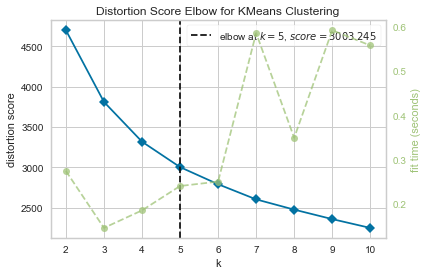

In [157]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(data)
visualizer.show()

Elbow მეთოდის მიხედვით, მონაცემები 5 კლასტერად უნდა დაიყოს. ახლა ვცადოთ კლასტერირება. მონაცემებში არ გვაქვს კატეგორიული ცვლადები ან გამოტოვებული მნიშვნელობები, ამიტომ შეგვიძლია კლასტერირება და თან KMeans-ის გამოყენება.

In [158]:
km = KMeans(n_clusters = 5, random_state=1234)
y = km.fit_predict(data)

clusters = [[] for _ in range(5)]
for indx, cluster in enumerate(y):
    clusters[cluster].append(indx)

ვიზუალიზაციისთვის გამოვიყენოთ PCA ალგორითმი.

In [159]:
%matplotlib inline

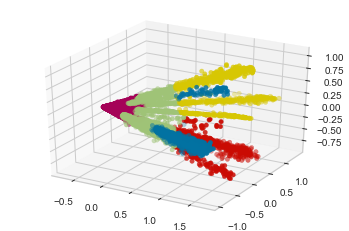

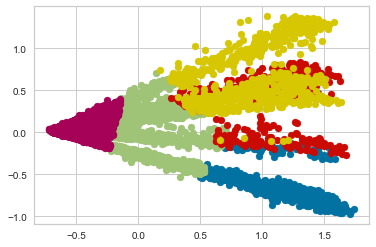

In [160]:
from sklearn.decomposition import PCA
def plot(X, clusters, dimension):
    if dimension == 3:
        ax = plt.figure().gca(projection='3d')
    else:
        ax = plt.figure().gca()
    for i, index in enumerate(clusters):
        point = X[index].T
        ax.scatter(*point)
    plt.show()
    
pca = PCA(n_components=3)
pca_components = pd.DataFrame(pca.fit_transform(data))
plot(np.asarray(pca_components), clusters, 3)

pca = PCA(n_components=2)
pca_components = pd.DataFrame(pca.fit_transform(data))
plot(np.asarray(pca_components), clusters, 2)

Pca-მ არც ისე ცუდი სურათი მოგვცა, მიუხედავად იმისა, რომ ფიჩერების რაოდენობა საკმაოდ ბევრი იყო და pca-ით 3 და 2 განზომილებაში დაყვანისას დიდი შანსია, რომ საკმაოდ ბევრი მონაცემი დაიკარგებოდა.

In [161]:
data['clusters'] = 0
for i in range(len(clusters)):
    data.loc[clusters[i], ['clusters']] = i

In [162]:
for i in range(len(clusters)):
    print("cluster ", i, len(clusters[i]))

cluster  0 939
cluster  1 2665
cluster  2 589
cluster  3 4919
cluster  4 784


აქ ვნახეთ, რომ მომხმარებლების რაოდენობა საკმაოდ არათანაბრადაა კლასტერებში განაწილებული. სავარაუდოა, რომ მომხმარებლები აქტიურობის მიხედვით არიან დაყოფილი კლასტერებად და ამან გამოიწვია ის, რომ მაგალითად გვაქვს 4919 მომხმარებლიანი კლასტერი, რომელიც სავარაუდოდ შეიცავს იმ მომხმარებლებს, რომლებიც არ არიან აპლიკაციის აქტიური მომხმარებლები, ანუ ეგრეთწოდებული "დამწყებები". ახლა ვნახოთ როგორ არიან მომხმარებლები კლასტერებში განაწილებული თითო ფიჩერის მიხედვით და ამისთვის გამოვიყენოთ stripplot ები, შემდეგ კი გამოვიტანოთ დასკვნები კლასტერების შესახებ.

In [163]:
def draw_clusters(data):
    columns = data.columns.values
    for column in columns:
        plt.figure(figsize=(10,4))
        sns.stripplot(data=data, x='clusters', y=column, hue='clusters')
        # violinplot, barplot, stripplot 

In [164]:
%matplotlib inline

<ipython-input-163-b0aa90144700>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,4))


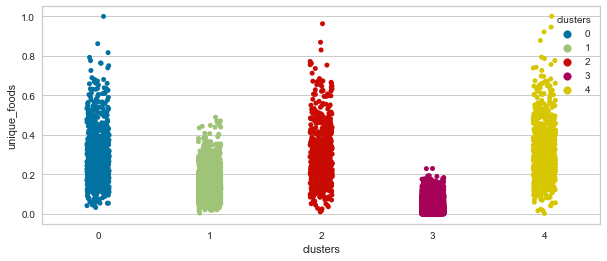

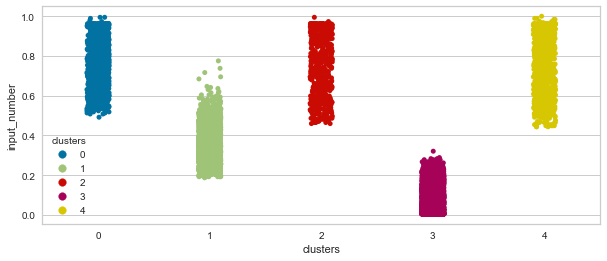

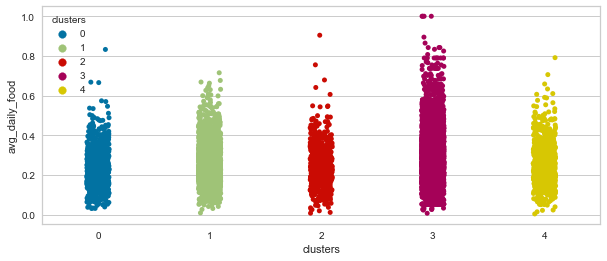

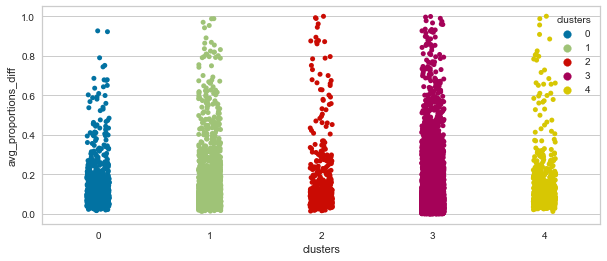

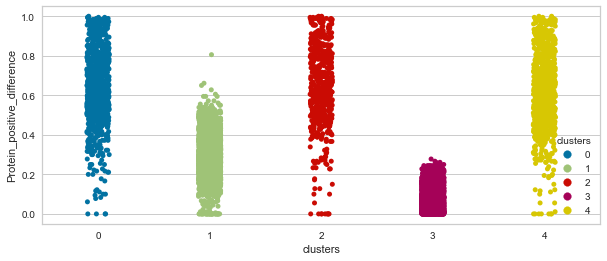

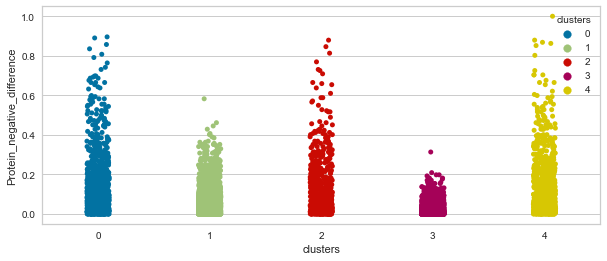

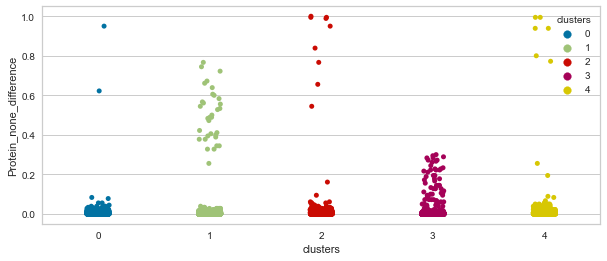

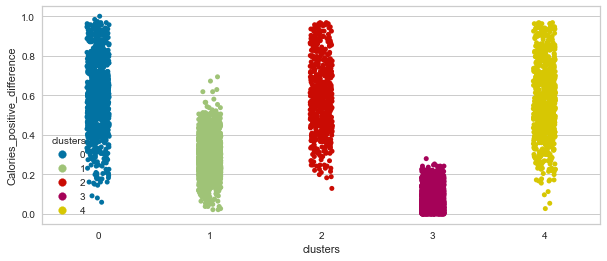

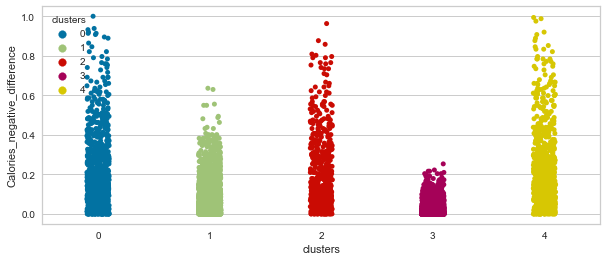

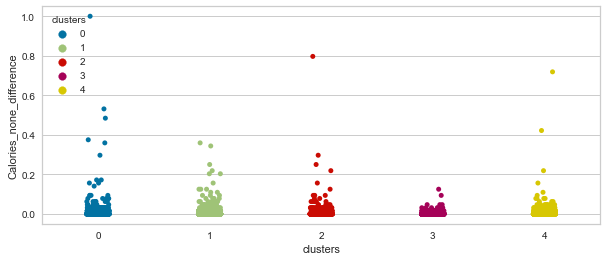

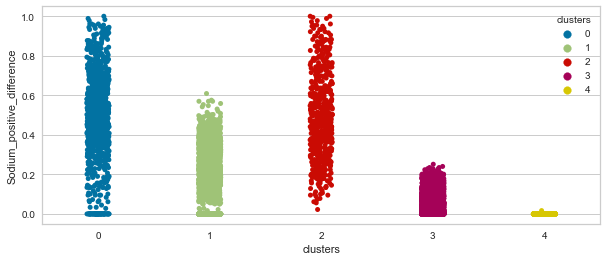

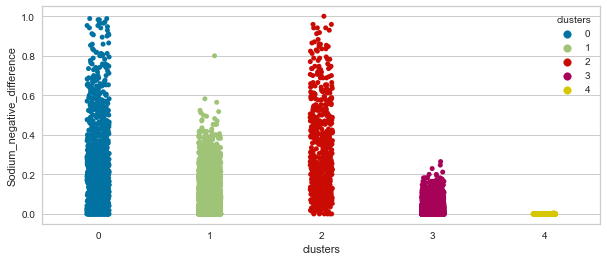

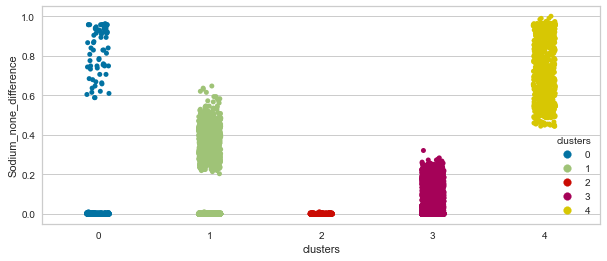

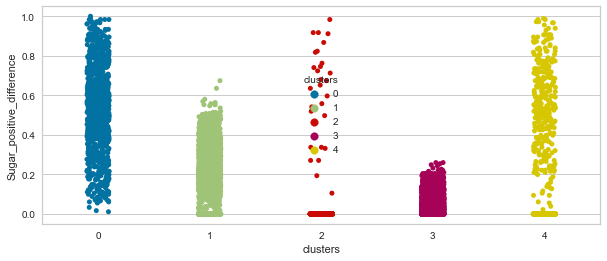

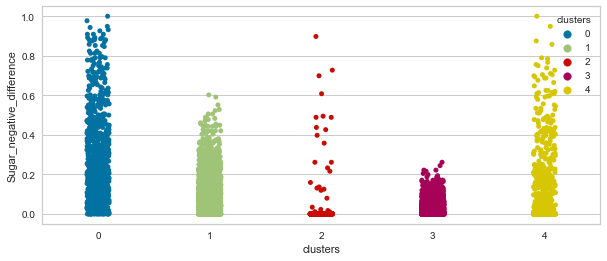

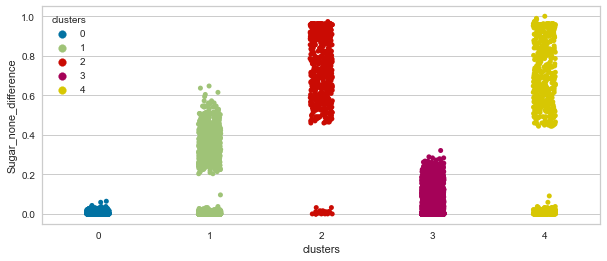

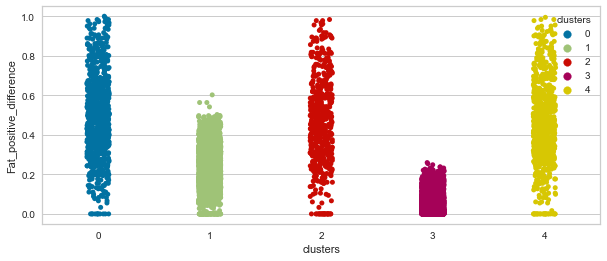

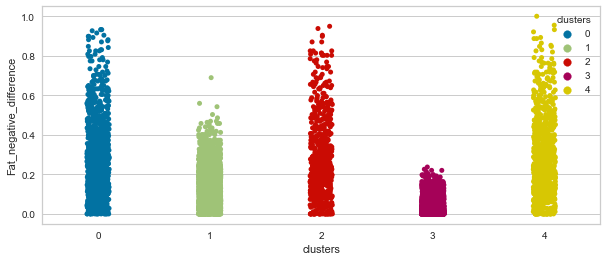

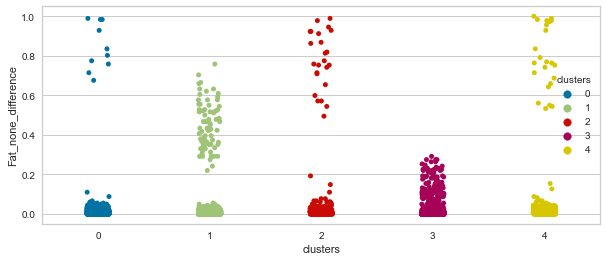

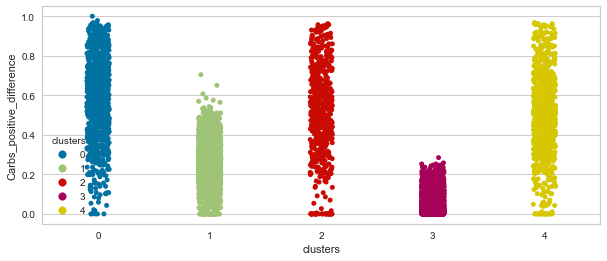

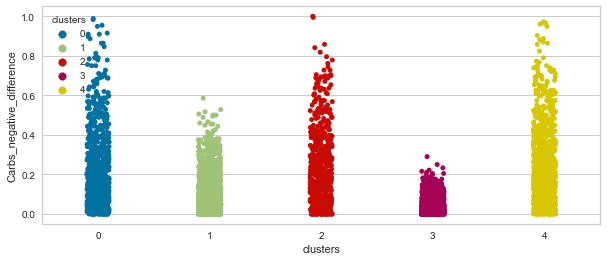

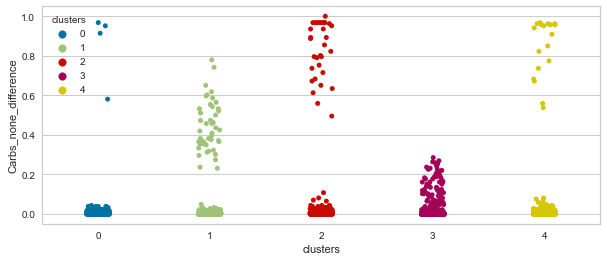

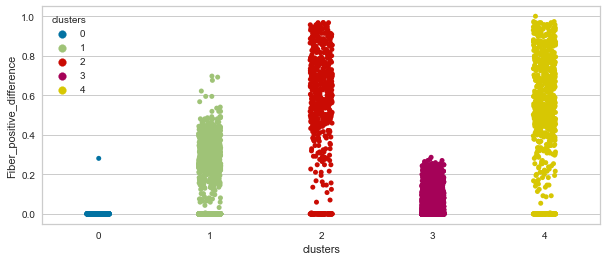

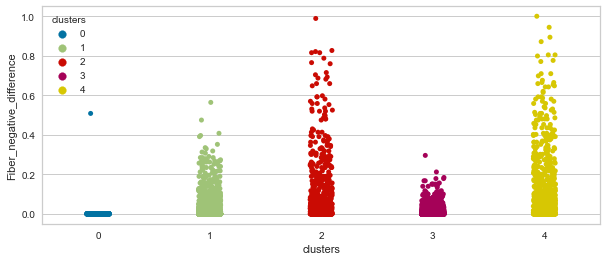

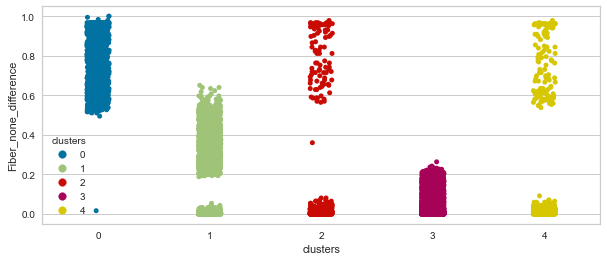

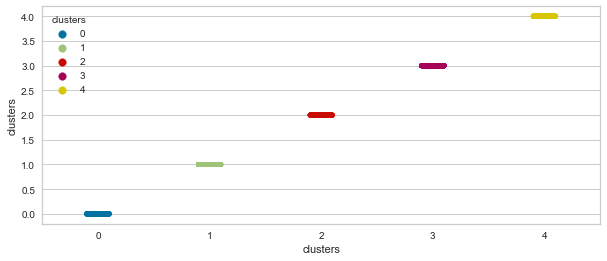

In [165]:
draw_clusters(data)

როგორც ვხედავთ, unique_foods-ის მიხედვით ყველაზე დაბალმაჩვენებლიანი იუზერები მე-3 კლასტერში არიან, შემდეგ კი 1-ში, ხოლო დანარჩენი 3 კლასტერი ერთმანეთს გვანან ამ მაჩვენებლით. ასევე input_number-შიც ყველაზე ნაკლები მონაცემები აქვთ 3 კლასტერში, შედარებით ოდნავ მეტი 1-ში, ხოლო დანარჩენ სამ კლასტერს ერთნაირი მაჩვენებლები აქვთ დაახლოებით. აქედან შეგვიძლია ზუსტად იმ დასკვნის გამოტანა, რომ მე-3 კლასტერის მომხმარებლები არიან ისინი, ვისაც ცოტაჯერ აქვს მონაცემები აპლიკაციაში შეყვანილი და შესაბამისად პასიური მომხმარებელია, პირველ კლასტერში მყოფებს შეიძლება დავარქვათ "საშუალო აქტიურობის" მომხმარებლები, ხოლო დანარჩენი კლასტერის იუზერები უკვე სტაბილური მომხმარებლები არიან აპლიკაციის. avg_daily_food-დან ბევრის თქმა არ შეგვიძლია, უბრალოდ იმის დანახვაა შესაძლებელი, რომ რახან მე-3 და 1 კლასტერებში ბევრი იუზერია რაოდენობრივად, მათი ვარიაციაც შედარებით დიდია, რადგან დღიურად შეყვანილი საჭმლის რაოდენობა ნაკლებადაა დამოკიდებული იუზერების აქტიურობაზე. რაც შეეხება პროპორციებს, აქ შეგვიძლია იმის დანახვა, რომ 1 და 3 კლასტერის იუზერებში უფრო დიდი მაჩვენებლებია აცდენის კალორიების ფორმულიდან (calories = 4 * proteins + 4 * carbs + 9 * fat), ვიდრე დანარჩენების. აქედან ჩნდება იმის ვარაუდი, რომ რახან პირველი და მესამე კლასტერის მომხმარებლები შედარებით ნაკლებად გამოცდილი არიან აპლიკაციის გამოყენებაში, არაადეკვატურად შეყავთ ნუტრიოტების რაოდენობა და ამით შეიძლება კიდევ გამყარდეს ვარაუდი იუზერების აქტიურობის მიხედვით განაწილების შესახებ.
რაც შეეხება დანარჩენ ფიჩერებს, რომლებიც არიან თითო ნუტრიოტის მიხედვით აცდენები (დადებით, უარყოფითი და არარსებული, ანუ ისეთი იუზერები, რომლებმაც საერთოდ არ შეიყვანეს კონკრეტული ნუტრიოტი), მათი მიხედვით უკვე შეგვიძლია დავადგინოთ განსხვავებები 3 "აქტიურ იუზერების" კლასტერებს შორის, კერძოდ, მათი ძირითადი გამნასხვავებელი ნიშანი არის სხვადასხვა ნუტრიოტების გამოუყენებლობა, ანუ ისინი იმით განსხავვდებიან ერთმაენთისგან რომ 7 ძირითადი ნუტრიოტიდან რომელიღაცის შესახებ ინფორმაცია ძალიან იშვიათად შეყავთ აპლიკაციაში. უფრო ზუსტად რომ ვთქვათ, ასეთი ნითიერებები გვაქვს 3: sugar, sodium და fiber. Sodium-ში none_difference აქვს მე-4 კლასტერს იუზერების ძალიან დიდი ნაწილისთვის, ანუ მათ არ შეყავთ ინფორმაცია ამ ნივთიერების შესახებ. ანალოგიური რამ შეგვიძლია ვთქვათ მე-2 კლასტერზე, რომელშიც მართალია რამდენიმე იუზერს აქვს ეს ინფორმაცია შეყვანილი, თუმცა ეს მცირე უზუსტობაა, ძირითადად აქაც none_difference კატეგორიაში არიან იუზერები განაწილებული. ანალოგიური სიტუაციაა 0 ნომრის კლასტერში Fiber ცვლადზე, რომელიც ისედაც ამ ნუტრიოტებს შორის ყველაზე ნაკლებად გამოყენებადი იყო და 0 კლასტერის იუზერებს თითქმის საერთოდ არ აქვთ მასზე ინფორმაცია შეყვანილი. მართალია, fiber-ის არ შეყვანა სხვა კლასტერებშიც ტენდენციაა, თუმცა 0 კლასტერი ყველაზე გამორჩეულია ამით, რასაც none_difference ში მისი ყველაზე დიდი მაჩვენებელი ადასტურებს.
კიდევ ერთი რამ, რისი თქმაც შეიძლება, არის ის, რომ ყველა ნივთიერებისთვის ყველა კლასტერში დადებითი აცდენები უფრო მეტად არის ხოლმე, ვიდრე უარყოფითი აცდენები, რამაც შეიძლება გვაფიქრებინოს, რომ უფრო მეტად მომხმარებლები მომატებას ცდილობენ ამ აპლიკაციით, ვიდრე დაკლებას, მაგრამ ეს სავარაუდოდ არასწორი დასკვნაა, რადგან ძირითადად ასეთი ტიპის აპლიკაციებს რეალურ ცხოვრებაში დაკლების სურვილის მქონე ადამიანები იყენებენ ხოლმე. აქ ჩვენ დასკალირებული მონაცემები გვაქვს და ასეთი დასკვნის გამოტანა პირდაპირ არასწორი იქნება ამიტომ, რადგან შესაძლოა უარყოფითი განსხვავებები რიცხვობრივად უფრო დიდებია, ვიდრე დადებითი. ამის შემოწმება რთული ნადმვილად არ არის და თუ ბოქს პლოტებს კიდევ ერთხელ ჩავხედავთ, მივხვდებით, რომ მართლაც ასე ხდება.

In [166]:
reporting_data = initial_data.iloc[:, 25:]
reporting_data['clusters'] = 0
for i in range(len(clusters)):
    reporting_data.loc[clusters[i], ['clusters']] = i

<ipython-input-166-4f9775bca40d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reporting_data['clusters'] = 0
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [167]:
%matplotlib inline

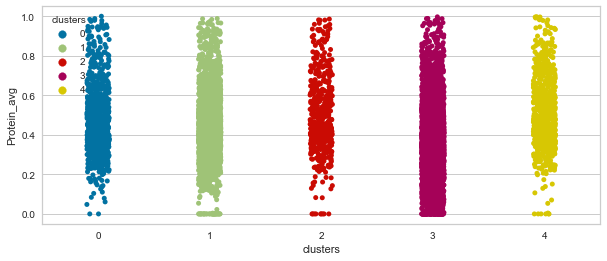

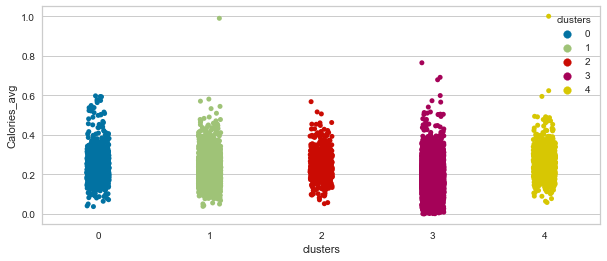

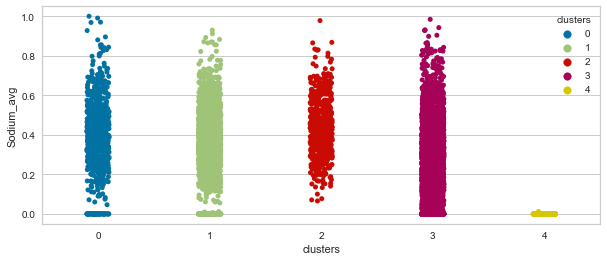

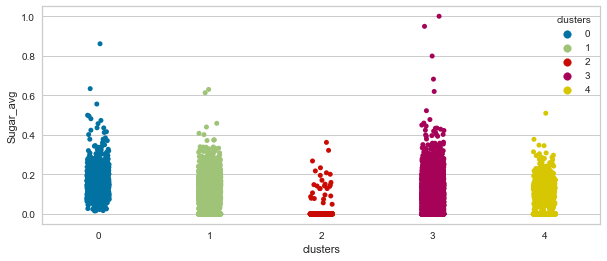

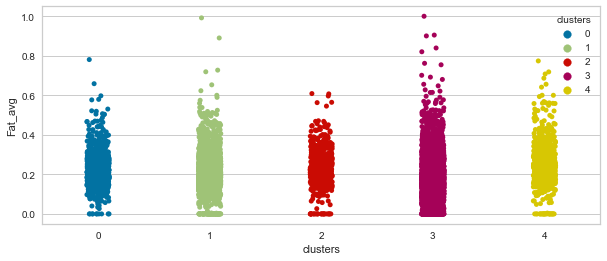

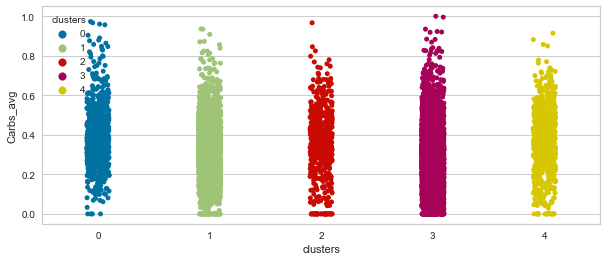

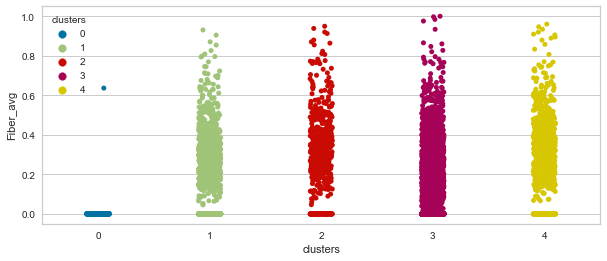

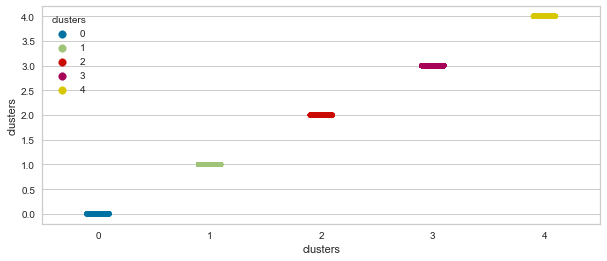

In [168]:
draw_clusters(reporting_data)

აქ არის უკვე რეპორტინგ ცვლადებად აღებული მონაცემების საშუალო და აქედან კიდევ ერთხელ შეგვიძლია ჩვენი გამოტანილი რამდენიმე დასკვნა გავამყაროთ, კერძოდ აქ ჩანს, რომ კლასტერებისთვის იმ ნუტრიოტების საშუალო, რომლებსაც არ იღებდნენ, 0-თან ძალიან ახლოსაა, ხოლო ზოგადი განაწილება თითქმის ერთნაირია ყველა ნუტრიოტის ყველა კლასტერში, რაც ზოგადი ტენდენციაა და ამის მიხედვით დიფერენცირებული არ არიან მიღებული კლასტერები.

In [169]:
%matplotlib inline

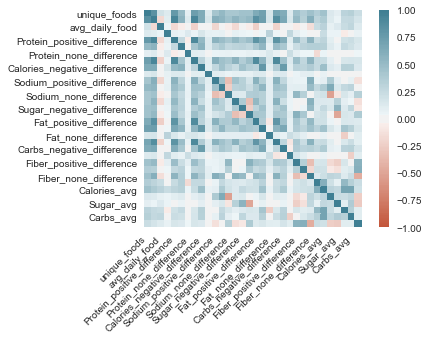

In [170]:
corr = initial_data.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

კორელაციის მატრიციდან განსაკუთრებული რამის დანახვა არაა შესაძლებელი. ძირითადად ერთნაირი ნუტრიოტების ცვლადებს შორის არის ხოლმე დიდი კორელაციები, რაც ლოგიკურია.

დღეების კლასტერიზაცია
-

დღეებისთვის შექმნილი data-ს ფიჩერებზეც უკვე ვისაუბრეთ, ამიტომ გადავიდეთ შემდეგ ნაწილებზე.

In [241]:
daysta = pd.read_csv('daily_data.csv')
daysta = daysta[daysta.columns[daysta.columns != 'Unnamed: 0']]
numerical_daysta = daysta[daysta.columns[daysta.columns != 'unique_dates']]
daysta.set_index(['unique_dates'])
daysta.head(5)

,unique_dates,unique_users,unique_meals,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif
0,2014-09-14,56,58,6.245841,136.231054,215.721612,6.989051,5.641176,13.127119,1.345013,58.267857,693.482143,676.178571,21.946429,26.785714,87.678571,10.142857
1,2014-09-15,280,223,6.949937,126.001244,181.622967,5.273216,4.787349,12.824839,1.381949,51.350000,596.467857,651.171429,25.589286,26.821429,79.975000,7.239286
2,2014-09-16,279,246,7.175121,128.075840,183.375952,4.897581,4.616700,13.330020,1.502986,47.451613,553.010753,644.118280,22.254480,23.992832,75.258065,6.917563
3,2014-09-17,274,253,7.279987,132.674687,185.938706,4.899329,4.967643,13.420027,1.529973,50.481752,550.788321,648.401460,22.259124,25.536496,71.854015,7.737226
4,2014-09-18,382,328,6.989593,127.458098,183.888365,4.790323,4.833859,13.187240,1.643258,47.141361,519.246073,640.293194,19.709424,24.845550,69.243455,7.638743


In [242]:
numerical_daysta.describe()

,unique_users,unique_meals,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,2823.009615,1381.745192,6.781277,130.135912,181.684028,4.751788,4.942422,13.319221,1.523824,50.646288,565.044055,724.280419,21.342681,25.386293,76.976753,6.767068
std,1105.981528,486.888045,0.291944,10.163442,12.463006,0.417965,0.543149,0.769307,0.087888,7.259852,66.288889,55.712396,3.391589,4.556518,11.064665,0.800513
min,17.000000,15.000000,6.245841,103.679487,127.396694,3.925926,2.794872,10.801282,1.345013,43.453844,491.709278,640.293194,18.529412,22.262578,68.510561,5.659091
25%,2162.000000,1107.750000,6.653459,122.723817,172.754553,4.595588,4.615498,12.815120,1.481809,47.045039,523.712028,686.905871,19.946431,23.439186,71.187718,6.286906
50%,2911.000000,1440.000000,6.738386,128.088385,180.628239,4.713085,4.803605,13.175496,1.519664,48.973714,548.922023,711.340450,20.755914,24.218992,74.243684,6.645741
75%,3659.250000,1707.500000,6.863871,136.332791,188.948178,4.837516,5.263893,13.780614,1.542557,52.138481,585.701890,750.226245,21.902209,25.998524,78.833625,7.144929
max,4531.000000,2128.000000,9.927290,199.154111,250.253333,9.610866,9.126229,18.025658,2.274081,119.001695,1032.202398,1097.682515,57.772016,61.545134,179.788701,11.675184


In [243]:
def boxplots_daysta(numerical_daysta):
    fig, axes = plt.subplots(8, 2, figsize=(20, 30))
    i = 0
    j = 0
    for feature in numerical_daysta.columns.values:
        sns.boxplot(ax=axes[i, j], x=numerical_daysta[feature])
        if j == 1:
            j = 0
            i += 1
        else:
            j += 1

In [244]:
def get_right(daysta, column):
    return boxplot_stats(daysta[column]).pop(0)['fliers'].min()

In [245]:
from matplotlib.cbook import boxplot_stats  
dic_less = {'unique_meals' : 250, 'Protein_average_sum' : 6.5, 'Sodium_average_sum' : 158, 'Fat_average_sum'
           :4, 'Carbs_average_sum' : 11.5,'Fiber_average_sum':1.4,  }
dic_more = {'Protein_average_sum' : 7.25, 'Calories_average_sum' : 158, 'Sodium_average_sum' : 218, 
           'Sugar_average_sum' : 5.3, 'Fat_average_sum' : 6, 'Carbs_average_sum' : 15, 'Fiber_average_sum':
           1.65, 'Protein_average_dif' : 60, 
            'Calories_average_dif' : get_right(daysta, 'Calories_average_dif'), 
            'Sodium_average_dif' : get_right(daysta, 'Sodium_average_dif'), 
            'Sugar_average_dif' : get_right(daysta, 'Sugar_average_dif'), 'Fat_average_dif' : get_right(daysta, 'Fat_average_dif'),
            'Carbs_average_dif' : get_right(daysta, 'Carbs_average_dif'), 'Fiber_average_dif' : get_right(daysta, 'Fiber_average_dif')
           }

In [246]:
%matplotlib inline

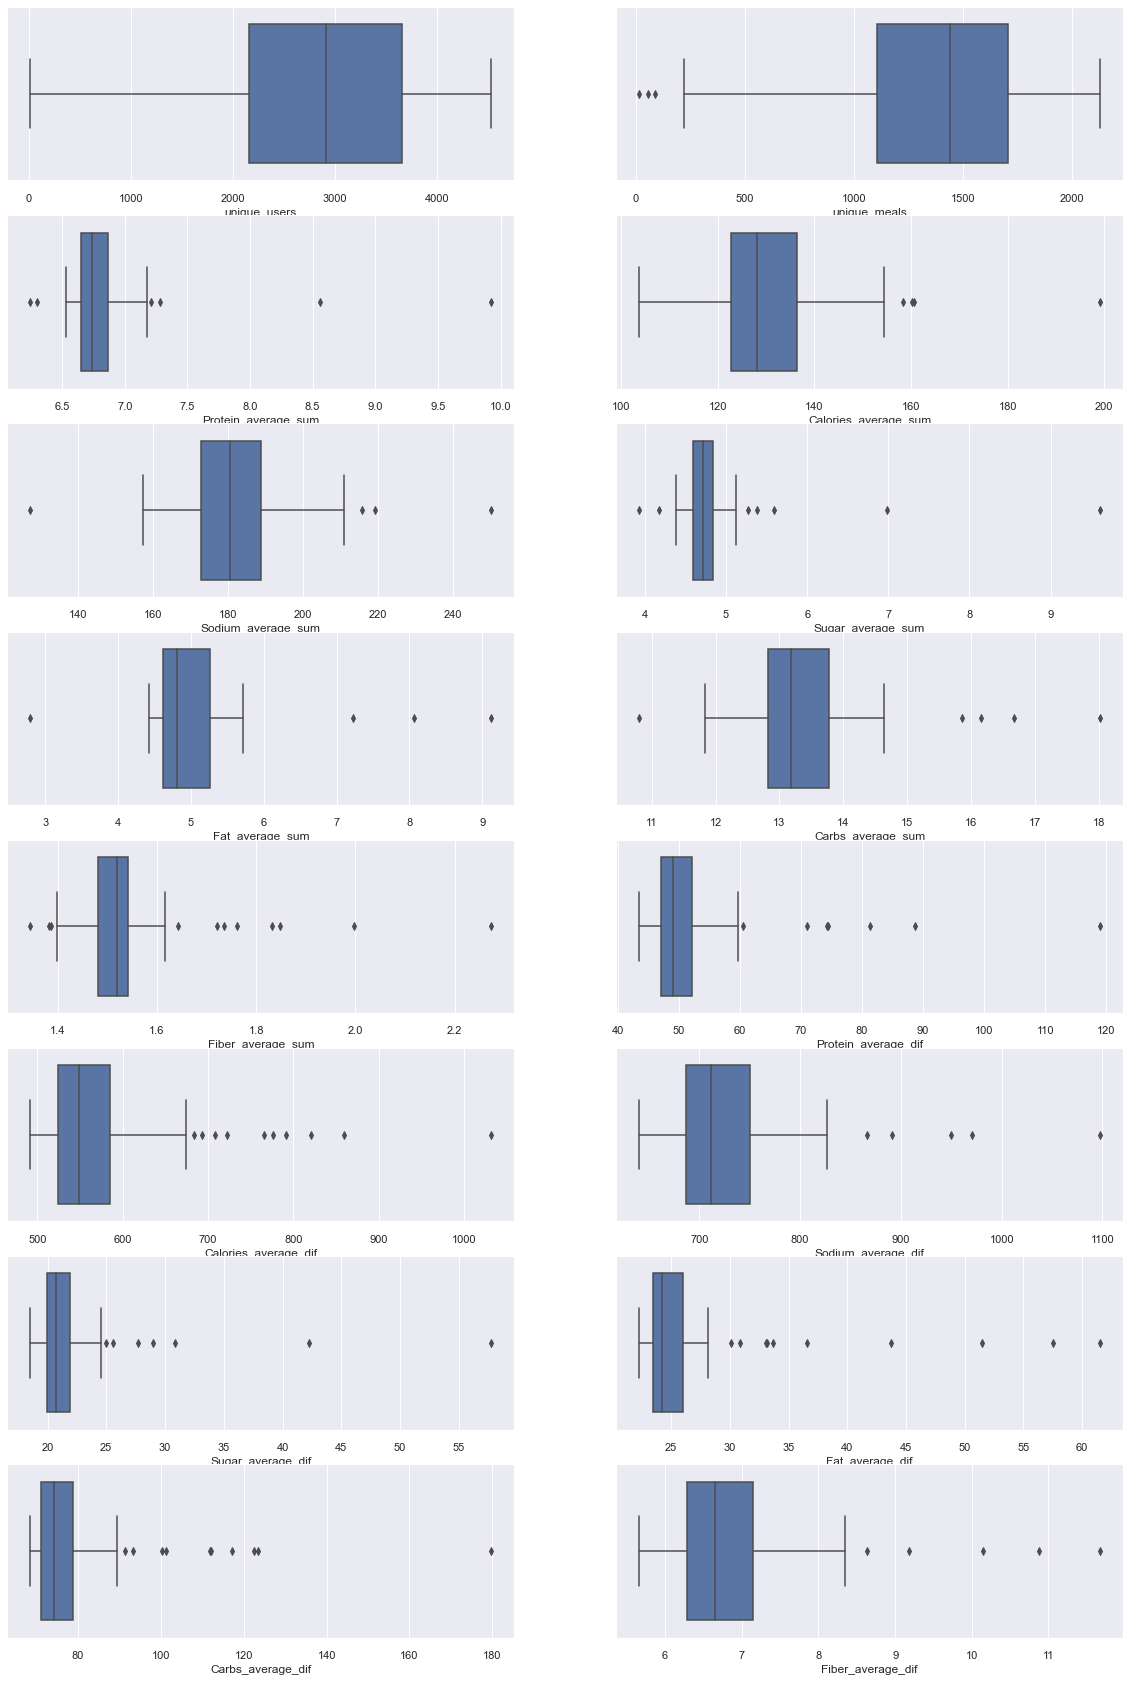

In [247]:
boxplots_daysta(numerical_daysta)

აუთლაიერების ამოღების საჭიროება ამ შემთხვევაშიც იყო, ამიტომ როგორც წინა კლასტერიზაციაში, ზუსტად იგივე რამ გავაკეთეთ აქაც.

In [248]:
for column in numerical_daysta.columns.values:
    df = numerical_daysta.loc[:, [column]]
    if column in dic_more:
        for i in df.index:
            if df.iloc[i, 0] >= dic_more[column]:
                numerical_daysta.loc[i, [column]] = numerical_daysta[column].median()
    if column in dic_less:
        for i in df.index:
            if df.iloc[i, 0] <= dic_less[column]:
                numerical_daysta.loc[i, [column]] = numerical_daysta[column].median()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [249]:
numerical_daysta /= numerical_daysta.max()

In [250]:
hopkins(numerical_daysta)

0.8509139705188651

ჰოპკინსიც მისაღებ შედეგს იძლევა.

In [251]:
%matplotlib inline

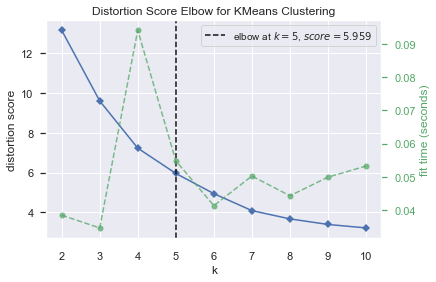

In [252]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(numerical_daysta)
visualizer.show()

აქაც აღმოჩნდა, რომ 5 კლასტერი არის მიზანშეწონილი, ამიტომ გავაკეთოთ იგივე ტიპის ალგორითმით კლასტერიზება.

In [253]:
km = KMeans(n_clusters = 5, random_state=1234)
y = km.fit_predict(numerical_daysta)

clusters_daysta = [[] for _ in range(5)]
for indx, cluster in enumerate(y):
    clusters_daysta[cluster].append(indx)

In [254]:
%matplotlib inline

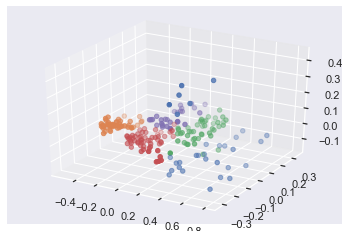

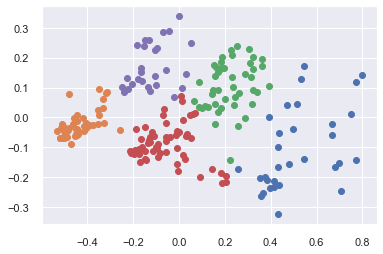

In [255]:
pca = PCA(n_components=3)
pca_components = pd.DataFrame(pca.fit_transform(numerical_daysta))
plot(np.asarray(pca_components), clusters_daysta, 3)

pca = PCA(n_components=2)
pca_components = pd.DataFrame(pca.fit_transform(numerical_daysta))
plot(np.asarray(pca_components), clusters_daysta, 2)

ვიზუალურად აქაც შეგვიძლია ვთქვათ, რომ მისაღები შედეგია, კიდევ ერთხელ pca-ის მუშაობის პრინციპიდან გამომდინარე.

In [256]:
daysta['clusters'] = 0
for i in range(len(clusters_daysta)):
    daysta.loc[clusters_daysta[i], ['clusters']] = i

In [257]:
def draw_clusters_daysta(daysta):
    columns = daysta.columns.values
    for column in columns:
        if column == 'unique_dates':
            continue
        plt.figure(figsize=(10,4))
        sns.stripplot(data=daysta, x='clusters', y=column, hue='clusters')
        # violinplot, barplot, stripplot 

In [258]:
%matplotlib inline

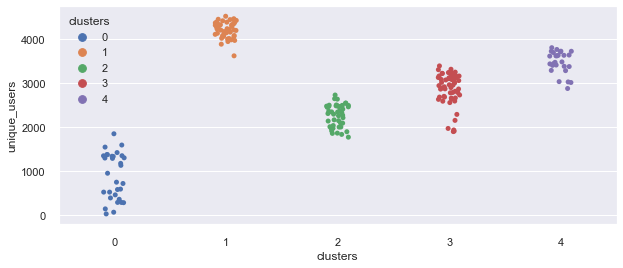

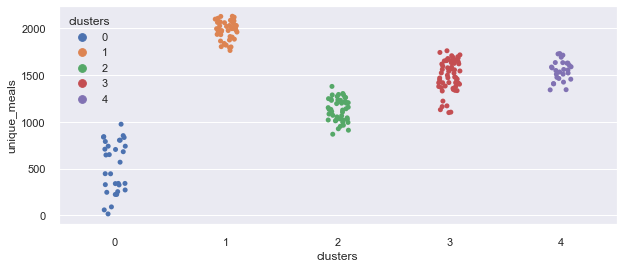

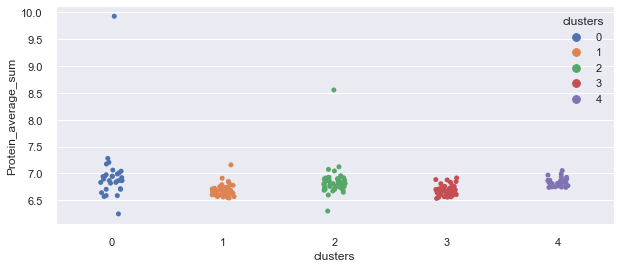

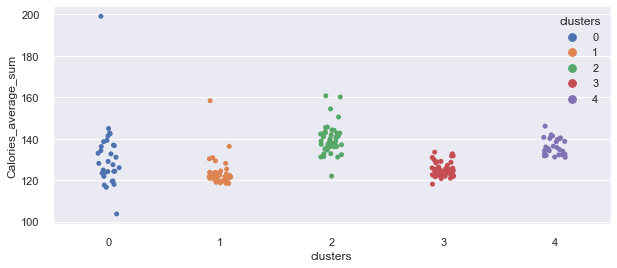

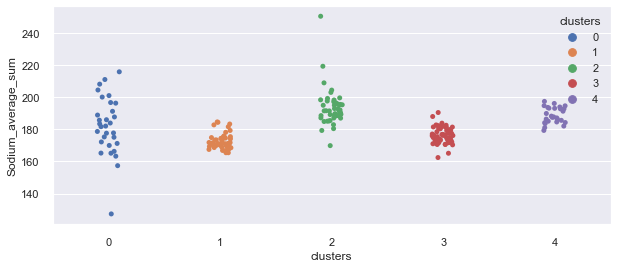

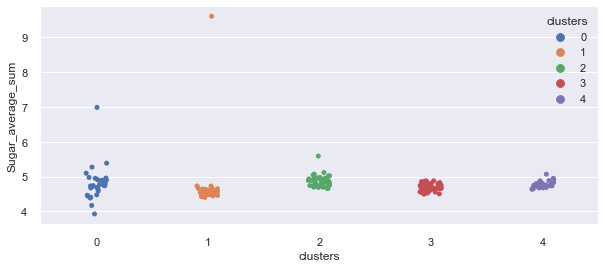

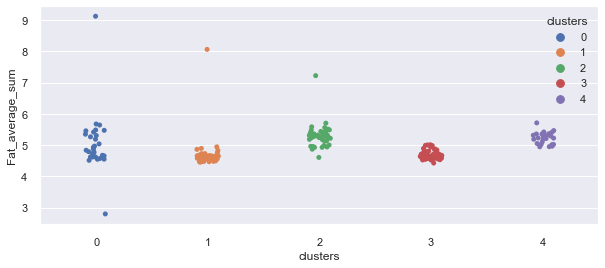

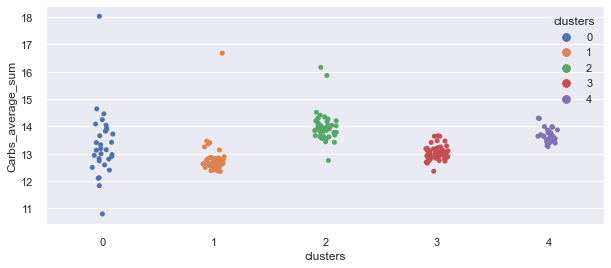

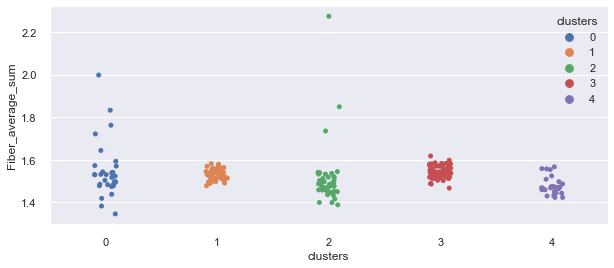

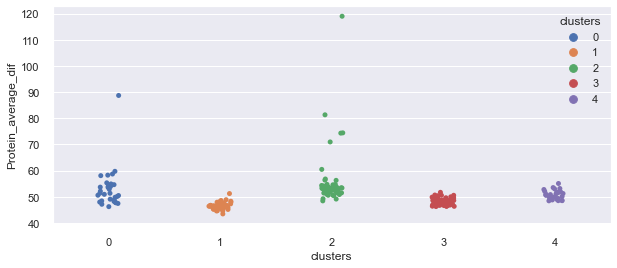

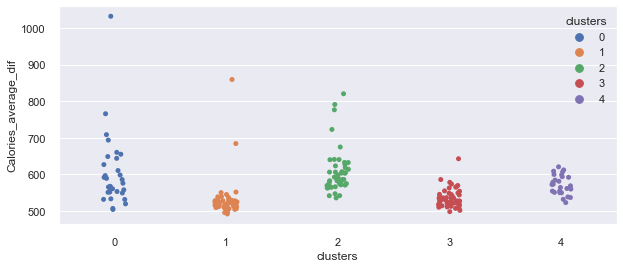

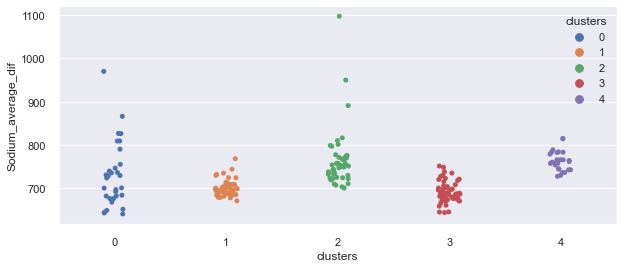

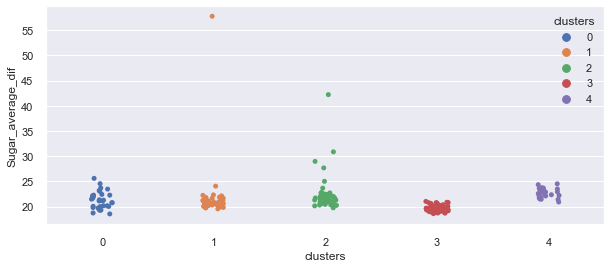

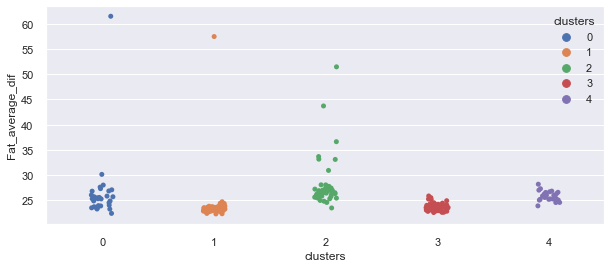

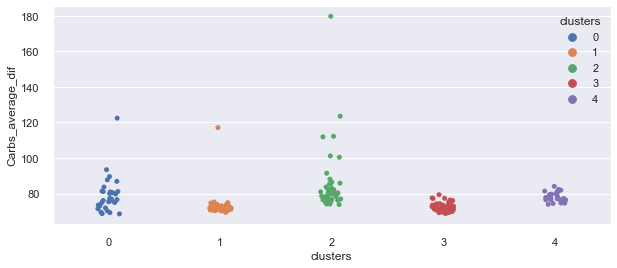

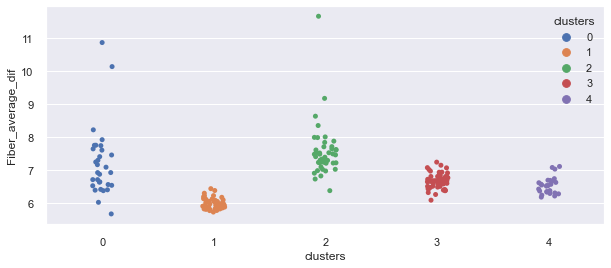

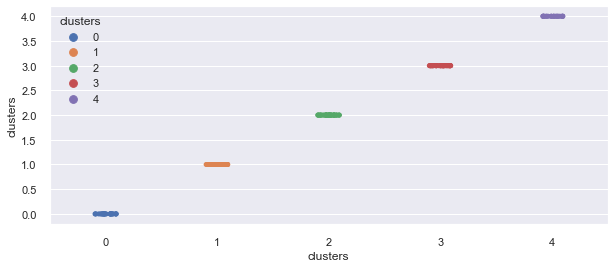

In [259]:
draw_clusters_daysta(daysta)

ამ კლასტერიზაციიდან არის რაღაცეების დანახვა შესაძლებელი. ყველაზე შესამჩნევი ფაქტი არის ის, რომ დღიურად უნიკალური იუზერების და შეყვანილი საჭმლის რაოდენობის მიხედვით კლასტერები ძალიან გვანან ერთმანეთს და თითქმის ზუსტად ერთნაირი თანაფარდობა აქვთ. ეს დიდად ინფორმატიული ფაქტი არ არის, უბრალოდ საინტერესო დამთხვევაა, რომ დაახლოებით 2-ჯერ მეტი არის ხოლმე თითო კლასტერში უნიკალური meal-ების რაოდენობა იუზერებთან შედარებით. ნუტრიოტების სხვაობები goal-სა და total-ს შორის და მათი საშუალო ჯამები არ გვაძლევს ასევე დიდ ინფორმაციას, რადგან მათი განაწილება დაახლოებით ყველა კლასტერში ერთნაირია, რაც მიუთითებს ზოგად ტენდენციაზე და არა ამ ნიშნით განსხვავებაზე. ყველაზე საინტერესო, რაც ამ კლასტერებიდან მივიღეთ, ჩანს მათი ყოველდღიური traffic-ის გრაფიკზე ასახვით, ვნახოთ ეს შედეგი.  

In [260]:
%matplotlib inline

No handles with labels found to put in legend.


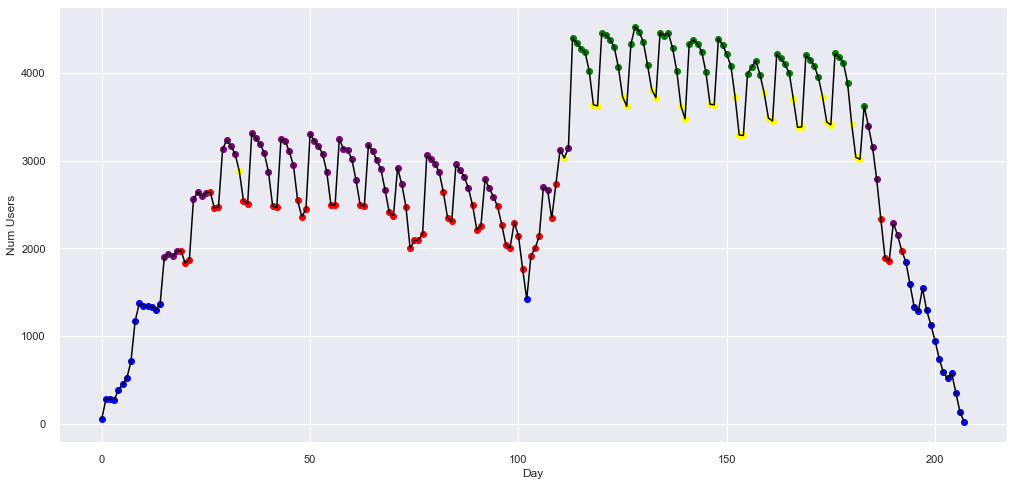

In [261]:
blu = daysta['unique_users']
cur_cluster = daysta['clusters']
plt.figure(figsize=(17, 8))
plt.plot([i for i in range(0, 208)], blu, color='black')
for i in range(0, 208):
    if cur_cluster[i] == 0:
        plt.scatter([i], [blu[i]], color='blue')
    elif cur_cluster[i] == 1:
        plt.scatter([i], [blu[i]], color='green')
    elif cur_cluster[i] == 2:
        plt.scatter([i], [blu[i]], color='red')
    elif cur_cluster[i] == 3:
        plt.scatter([i], [blu[i]], color='purple')
    else:
        plt.scatter([i], [blu[i]], color='yellow')
plt.ylabel('Num Users')
plt.xlabel('Day')
plt.legend()
plt.show()

როგორც ვხედავთ, ერთმანეთისგან ყველაზე მეტად გამოყოფილი ეს დღეები გამოვიდა სწორედ traffic-ის მიხედვით. ლურჯ კლასტერზე შეგვიძლია ვთქვათ, რომ კიდეებში მოთავსებული დღეები არის აღნიშნული, თუმცა ამ დღეებზე ბევრს ვერაფერს ვიტყვით, რადგან არ ვიცით მართლა ასეთი დაბალი აქტივობაა ამ დღეებში თუ სხვა რამ ხდება. დანარჩენ კლასტერებზე კი შეგვიძლია ბევრი რამე ვთქვათ. თუ გრაფიკს დავაკვირდებით, შევამჩნევთ, რომ გვაქვს რაღაც განმეორებითი ფორმები, იგივე სეზონები. ეს თითო 'კბილი' არის 7 დღიანი პერიოდი, რომელზეც შეგვიძლია შევამჩნიოთ, რომ მაღალი აქტივობის დღეები არის ძირითადად ვიქენდი და მათთან ახლოს დღეები, რადგან ამ დროს ხალხს უფრო სცალია, რომ იზრუნოს სხეულის ფორმებზე თუ კვების რაციონზე. ასევე არის 1 ჩავარდნის დღეც, რომელიც, თუ გამოვთვლით, ვნახავთ, რომ შობას ემთხვევა და ეს არც არის გასაკვირი. შემდეგ კი არის მკვეთრი ზრდა რისი მიზეზის ამოხსნაც ჩვენ არ შეგვიძლია, თუმცა აშკარად გარდამტეხი პერიოდია აქტივობის მხრივ აპლიკაციისთვის. ყვითელ კლასეტრზე ცალსახად შეგვიძლია ვთქვათ, რომ გარდამტეხ პერიოდამდე მაღალი აქტიოვბის დღეებს მოიცავს, თუმცა რამდენიმე დღე გრაფიკის ბოლოშიც არის ამ კლასტერის ნაწილი. იგივე ტიპის დღეებს მოიწავს მწვანე კლასტერი, თუმცა ეს არის უკვე გრაფიკის 'მეორე ნაწილში'. წითელი და იასამნისფერი კლასტერები შესაბამისად არიან ცვლილებამდე და ცვლილების შემდეგ პასიური დღეები.

In [262]:
%matplotlib inline

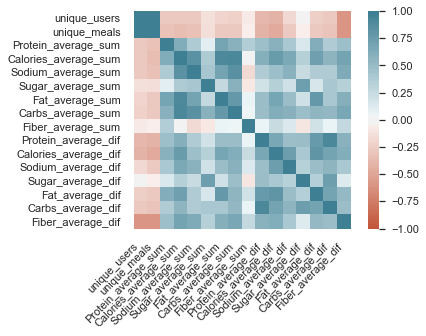

In [263]:
corr = daysta[daysta.columns[daysta.columns != 'clusters']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

კორელაციის მატრიციდან unique_users და unique_meals შორის მაღალი კორელაციის დანახვა შეიძლება, თუმცა ეს როგორც ვთქვით დიდი ინფორმაციის მომცემი ფაქტი არ არის. კალორიებზეც შეგვიძლია დავინახოთ, რომ მისი დამოკიდებულება იმ 3 ნუტრიოტის მიმართ საკმაოდ დიდია, რომლებიც ფორმულად გამოვიყენეთ კალორიების დაახლოებითი რაოდენობის შესაფასებლად (calories = 4 * proteins + 4 * carbs + 9 * fat). კიდევ ერთი საინტერესო ფაქტი არის ის, რომ unique_users-ს (და შესაბამისად unique_meals-ს) აქვთ უარყოფითი დამოკიდებულება ყველა ნუტრიოტის dif და sum ის მიმართ, რაც სავარაუდოდ გამოწვეულია იმით, რომ რაც უფრო მეტი იუზერი მოიხმარს დღის განმავლობაში აპლიკაციას, მით უფრო მეტად შემცირდება საშუალო მნიშვნელობა, რადგან ყოველი ახალი იუზერის დამატება სავარაუდოდ დაბალი მნიშნელობის sum ან dif-ის დამატებას გამოიწვევს აქამდე შეყვანილ მნიშვნელობებთან შედარებით, რაც თავისთავად საშუალო მნიშვნელობას დაწევს.

In [264]:
daysta

,unique_dates,unique_users,unique_meals,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif,clusters
0,2014-09-14,56,58,6.245841,136.231054,215.721612,6.989051,5.641176,13.127119,1.345013,58.267857,693.482143,676.178571,21.946429,26.785714,87.678571,10.142857,0
1,2014-09-15,280,223,6.949937,126.001244,181.622967,5.273216,4.787349,12.824839,1.381949,51.350000,596.467857,651.171429,25.589286,26.821429,79.975000,7.239286,0
2,2014-09-16,279,246,7.175121,128.075840,183.375952,4.897581,4.616700,13.330020,1.502986,47.451613,553.010753,644.118280,22.254480,23.992832,75.258065,6.917563,0
3,2014-09-17,274,253,7.279987,132.674687,185.938706,4.899329,4.967643,13.420027,1.529973,50.481752,550.788321,648.401460,22.259124,25.536496,71.854015,7.737226,0
4,2014-09-18,382,328,6.989593,127.458098,183.888365,4.790323,4.833859,13.187240,1.643258,47.141361,519.246073,640.293194,19.709424,24.845550,69.243455,7.638743,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2015-04-05,515,271,6.921683,141.279944,187.666964,4.733155,5.415024,13.658904,1.437257,58.079612,660.137864,826.499029,23.683495,27.052427,89.520388,7.452427,0
204,2015-04-06,574,341,6.846955,117.933080,165.196948,4.474334,4.511377,12.123652,1.569868,53.689895,643.672474,736.179443,21.113240,25.165505,80.905923,6.916376,0
205,2015-04-07,351,223,6.975521,117.602647,163.284166,4.382934,4.545600,12.103809,1.720886,49.811966,610.327635,808.908832,21.458689,25.279202,83.658120,6.381766,0
206,2015-04-08,132,90,6.832445,116.566238,157.385554,4.169051,4.736802,11.833466,1.832423,54.030303,708.477273,826.106061,21.257576,25.803030,86.848485,5.659091,0


In [265]:
data.head(1)

,unique_foods,input_number,avg_daily_food,avg_proportions_diff,Protein_positive_difference,Protein_negative_difference,Protein_none_difference,Calories_positive_difference,Calories_negative_difference,Calories_none_difference,...,Fat_negative_difference,Fat_none_difference,Carbs_positive_difference,Carbs_negative_difference,Carbs_none_difference,Fiber_positive_difference,Fiber_negative_difference,Fiber_none_difference,clusters,dates_list
0,0.114504,0.925134,0.077578,0.443833,0.25,0.697802,0.005556,0.306452,0.716049,0.0,...,0.587571,0.010989,0.854839,0.079545,0.0,0.0,0.0,0.930108,0,"[""2014-09-15"", ""2014-09-16"", ""2014-09-17"", ""20..."


In [268]:
data['dates_list'] = dates

In [269]:
def get_dates_list(data, i):
    return json.loads(data.loc[i, 'dates_list'])

In [270]:
def get_clusters_info(data, cluster, dictionary):
    df = data.loc[data.clusters == cluster, ['dates_list']]
    for i in df.index:
        dates_list = get_dates_list(data, i)
        for date in dates_list:
            dictionary[date] += 1

In [271]:
unique_dates = daysta['unique_dates']
clusters_info = [{} for _ in range(5)]
for cluster in range(0,5):
    for date in unique_dates:
        clusters_info[cluster][date] = 0
    get_clusters_info(data, cluster, clusters_info[cluster])

In [272]:
active_users_traffic = []
passive_users_traffic = []
average_users_traffic = []
for date in unique_dates:
    passive_users_traffic.append(clusters_info[3][date])
    active_users_traffic.append(clusters_info[0][date] + clusters_info[2][date] + clusters_info[4][date])
    average_users_traffic.append(clusters_info[1][date])

In [273]:
%matplotlib inline

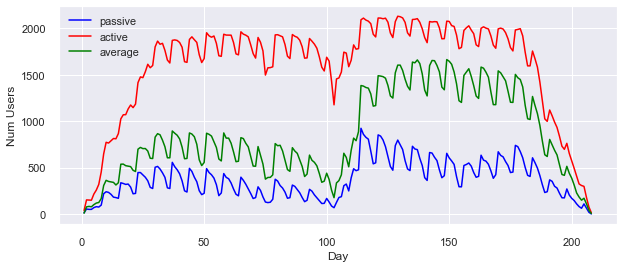

In [274]:
bla = [i for i in unique_dates]
plt.figure(figsize=(10, 4))
plt.plot([i for i in range(1, 209)], passive_users_traffic, color='blue', label='passive')
plt.plot([i for i in range(1, 209)], active_users_traffic, color='red', label='active')
plt.plot([i for i in range(1, 209)], average_users_traffic, color='green', label='average')
plt.ylabel('Num Users')
plt.xlabel('Day')
plt.legend()
plt.show()

ამ გრაფიკზე ნაჩვენებია იუზერების დაყოფის მიხედვით დღეების აქტივობები. როგორც ვხედავთ, პასიური იუზერების აქტივობის გრაფიკი ყველაზე დაბლა მოხვდა, მიუხედავად იმისა, რომ მათი ჯამური რაოდენობა ყველა იუზერის დაახლოებით ნახევარია. შემდეგ არის საშუალო იუზერების აქტივობის გრაფიკი. მათი რაოდენობა დაახლოებით ყველა იუზერის მეოთხედია, ასევე არის აქტიური იუზერების ჯამური რაოდენობაც და როგორც ვხედავთ მათი გრაფიკი ყველაზე ზემოთაა, ანუ ეს ნიშნავს, რომ ჩვენი ეს დასვკნა მართებული არის და იუზერების კლასტერები მართლაც ამ ნიშნით არის გამოყოფილი ერთმანეთისგან. თუ ამ გრაფიკებს 'ავჯამავთ', მივიღებთ მთლიანი traffic ის გრაფიკს.

აქტივობის წინასწარმეტყველება
-

In [275]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
import seaborn as sns
sns.set()

In [276]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [277]:
dsta = daysta.copy()
dsta.set_index(unique_dates, inplace=True)

In [278]:
dsta.head(1)

,unique_dates,unique_users,unique_meals,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif,clusters
unique_dates,,,,,,,,,,,,,,,,,,
2014-09-14,2014-09-14,56,58,6.245841,136.231054,215.721612,6.989051,5.641176,13.127119,1.345013,58.267857,693.482143,676.178571,21.946429,26.785714,87.678571,10.142857,0


In [279]:
%matplotlib inline

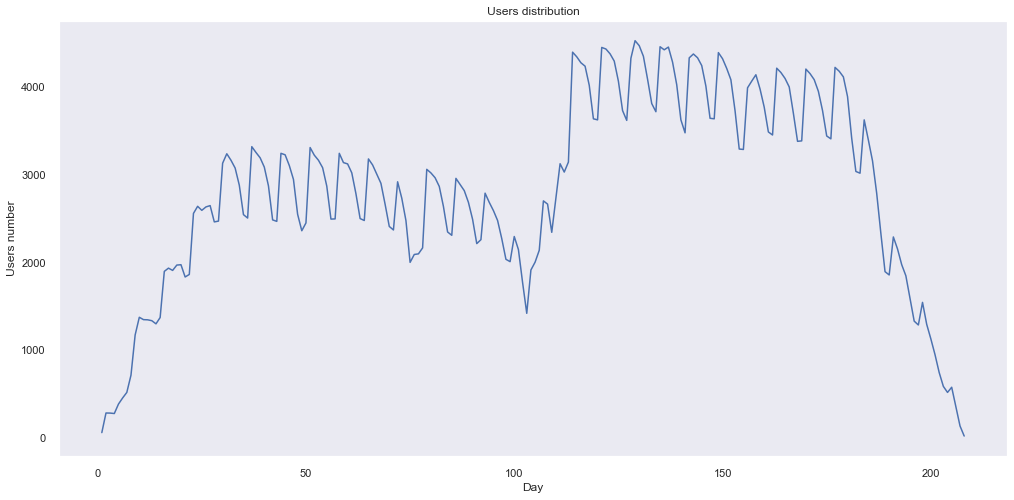

In [280]:
plt.figure(figsize=(17, 8))
plt.plot([i for i in range(1, 1 + len(dsta.unique_users))], dsta.unique_users)
plt.title('Users distribution')
plt.ylabel('Users number')
plt.xlabel('Day')
plt.grid(False)
plt.show()

Moving average
-

ჩვენ გვჭირდება traffic-ის სტოკის გამოცნობა. ამისთვის ვაპირებთ ARIMA მოდელის გამოყენებას, თუმცა მანამდე მარტივი მოდელების გამოყენება ვცადოთ. Moving average მოდელი ყველაზე მარტივი მიდგომაა ასეთი ტიპის მოდელებში. შესაძლოა, მარტივმა მოდელმა მოგვცეს კარგი შედეგი, მაგრამ მისგან მომავლის წინასწარმეტყველებას არ უნდა ველოდეთ და უბრალოდ უნდა გამოვიყენოთ ტრენდის დასაჭერად. სხვადასხვა ზომის window ების შესაბამისად გრაფიკი შეიცვლება და რაც უფრო დიდი იქნება window-ს ზომა, უკეთ დავინახავთ არსებულ ტრენდს.

In [281]:
%matplotlib inline

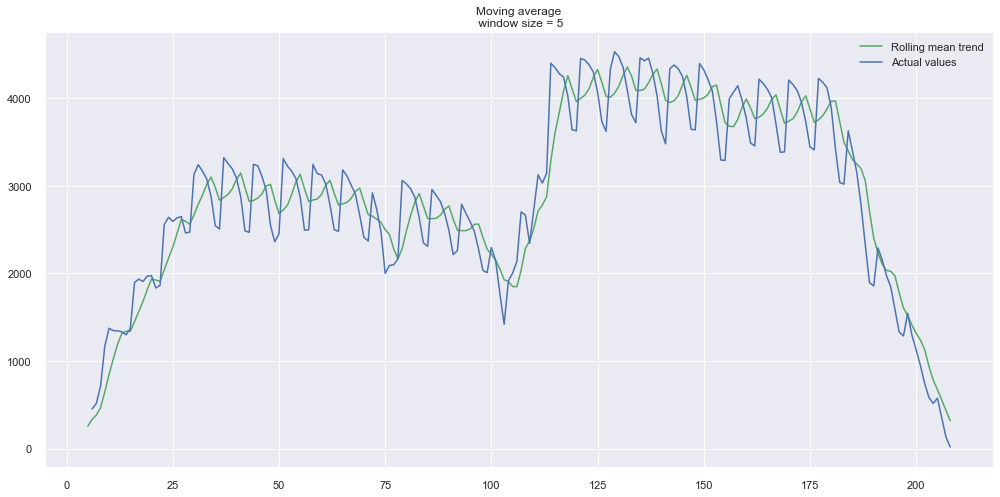

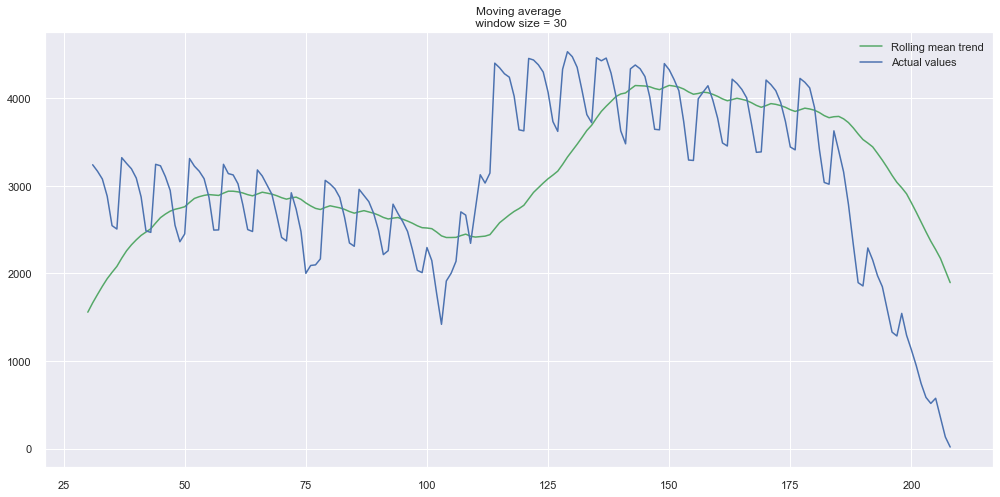

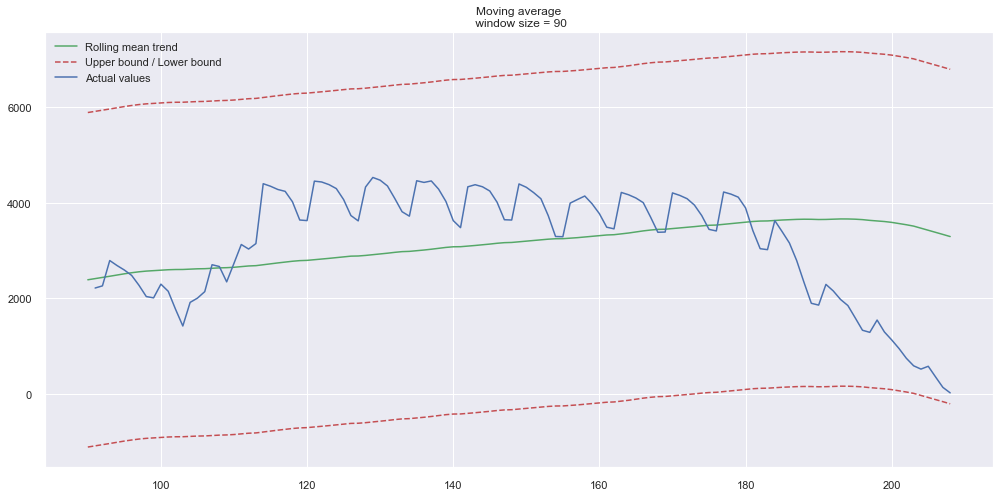

In [282]:
def plot_moving_average(series, window, length, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    arr = [i for i in range(1, length + 1)]
    plt.plot(arr, rolling_mean, 'g', label='Rolling mean trend')
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(arr,upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(arr, lower_bound, 'r--')          
    plt.plot(arr[window:], series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 5 days (by week)
plot_moving_average(dsta.unique_users, 5, len(dsta))
#Smooth by the previous month (30 days)
plot_moving_average(dsta.unique_users, 30, len(dsta))
#Smooth by previous quarter (90 days)
plot_moving_average(dsta.unique_users, 90, len(dsta), plot_intervals=True)

როგორც ვნახეთ, 5 ზომის ფანჯრის შემთხვევაში საკმაოდ კარგი მიახლოვება მოგვცა moving average მოდელმა ნამდვილ stock თან, თუმცა როგორც აქამდე ვთქვით, ჩვენი მიზანი ეს არ ყოფილა. 30-იანი ზომის შემთხვევაში მთლიან გრაფიკში შეიმჩნევა პარაბოლოიდის ფორმა, 90-ის შემთხვევაში კი უფრო პატარა უბნებზე წრფივი ფორმა, მაგრამ მნიშვნელოვანია აქ 30 ფანჯრიანი მოდელის შედეგი, სადაც მთლიანი გრაფიკის ზოგადი ტრედი ჩანს.

Dickey-fuller test
-

ახლა ვაპირებთ, გამოვიყენოთ ARIMA მოდელი, რომელსაც რეალური ფრედიქშენისთვის გამოვიყენებთ, თუმცა სანამ არიმა მოდელს გამოვიყენებთ, მანამდე უნდა გავხადოთ ჩვენი გრაფიკი სტაციონალური. იმის დასადგენად, არის თუ არა სტაციონალური გრაფიკი, გამოვიყენებთ დიკი-ფულერის ტესტს და არასტაციონალურობის შემთხვევაში ვცდით გავხადოთ სტაციონალური.

In [283]:
%matplotlib inline

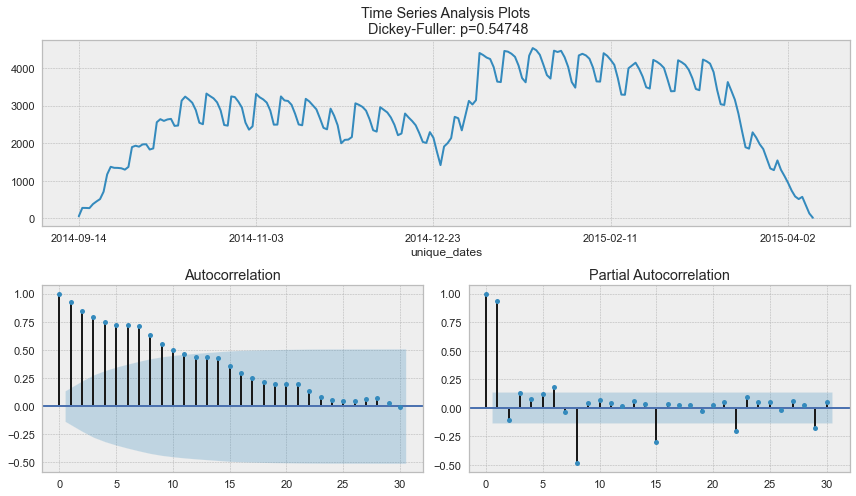

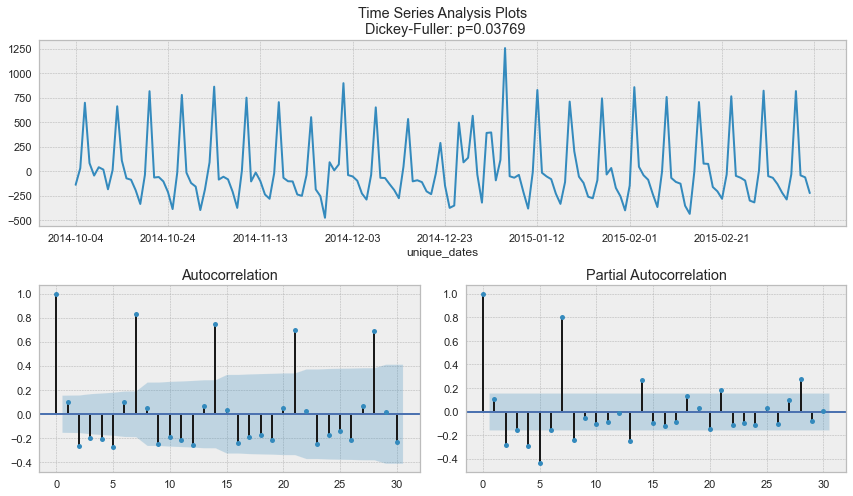

In [284]:
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(dsta.unique_users, lags=30)

# Take the first difference to remove to make the process stationary
data_diff = dsta.unique_users - dsta.unique_users.shift(1)

tsplot(data_diff[20:180], lags=30)

დიკი-ფულერის ტესტმა ცუდი შედეგი მოგვცა და საჭირო გახდა, რომ გრაფიკი გაგვეხადა სტაციონალური. p მნიშნელობა იყო დაახლოებით 0.5-ის ტოლი, ამიტომ საჭიროა, რომ სტაციონალურობისთვის გამოვაკლოთ მნიშვნელობებს მათი წინა მნიშნელობები. ამის შემდეგ ტესტის მნიშნელობაა 0.05-თან ახლოს, რაც დამაკმაყოფილებელია, თუმცა, როგორც ვხედავთ, სეზონურობა შენარჩუნებულია, ამიტომ გამოვიყენოთ SARIMA მოდელი. ასევე ამოვაკლოთ მონაცემები, რომლებიც ხდიდნენ გრაფიკს არასტაციონალურს. ხელით შევარჩიეთ შესაბამისი მნიშვნელობები, რომლისთვისაც ეს ხდებოდა.

In [285]:
dsta = dsta.iloc[20:180, :]

In [297]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

სანამ SARIMA მოდელს გამოვიყენებთ, მანამდე საჭიროა, რომ მისი პარამეტრები შევარჩიოთ სწორად. ამისთვის საჭიროა, რომ ყველა შესაძლო კომბინაცია ვცადოთ სხვადასხვა პარამეტრების მნიშნელობების და საუკეთესო შედეგის მქონდე პარამეტრები ავარჩიოთ მოდელისთვის. სეზონურობის პარამეტრად ვირჩევთ 7-ს, რადგან 7 სიგრძის სეზონები გვაქვს, როგორც ეს აქამდეც ჩანდა, ისევე შენარჩუნდა გასტაციონალურებისას. p პარამეტრი არის ავტორეგრესიული მოდელის პარამეტრი, ხოლო q moving average მოდელის. რაც შეეხება d პარამეტრს, ის არის სტაციონალურამდე მისაყვანი ცვლილებების რაოდენობა, ხოლო შესაბამაისი პარამეტრები Capiral letter ებით არის სეზონურობის პარამეტრები. დამატებითი პარამეტრი ასევე არის seasonality, რომელიც სეზონურობის სიგრძეს აღნიშანვს. 

In [298]:
ps = range(0, 5)
qs = range(0, 5)
d = 1
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
seasonality = 7
parameters = product(ps, qs, Ps, Qs)

In [299]:
dsta.head(1)

,unique_dates,unique_users,unique_meals,Protein_average_sum,Calories_average_sum,Sodium_average_sum,Sugar_average_sum,Fat_average_sum,Carbs_average_sum,Fiber_average_sum,Protein_average_dif,Calories_average_dif,Sodium_average_dif,Sugar_average_dif,Fat_average_dif,Carbs_average_dif,Fiber_average_dif,clusters
unique_dates,,,,,,,,,,,,,,,,,,
2014-10-04,2014-10-04,1833,998,6.92071,144.278482,197.556239,4.942594,5.584075,14.410187,1.501099,53.274414,603.444626,724.902346,21.958538,27.74359,82.23677,7.642117,2


In [300]:
s = 15
tmp_data = dsta.iloc[:-s,:]
def optimize_SARIMA(parameters_list, d, D, seasonality):
    results = []
    best_aic = float('inf')
    for param in tqdm_notebook(parameters_list):
        try: model = SARIMAX(tmp_data.unique_users, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], seasonality)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        
    
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
    results = sorted(results, key=lambda x: x[1])
    
    return results[0][0]

tmp_data-ში შენახული გვაქვს დასატრენინგებელი data. test ნაწილს, რომლის სიგრძეც არის 15, არ ვიყენებთ მოდელის დასატრენინგებლად და ტესტზე ვნახოთ საბოლოოდ შედეგი. საუკეთესო პარამეტრების არჩევის შემდეგ დავატრენინგოთ SARIMA მოდელი.

In [301]:
# p, q, P, Q = optimize_SARIMA(list(parameters), d, D, seasonality)

best_model = SARIMAX(tmp_data.unique_users, order=(p, d, q), seasonal_order=(P, D, Q, seasonality)).fit()

best_model.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: C

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        unique_users   No. Observations:                  145
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 7)   Log Likelihood                -874.429
Date:                             Sat, 20 Feb 2021   AIC                           1764.858
Time:                                     19:56:03   BIC                           1788.218
Sample:                                 10-04-2014   HQIC                          1774.351
                                      - 02-25-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4396      0.110      3.988      0.000       0.224       0.656
ar.L2         -0.8950      0.127     -7.068      0.000      -1.143      -0.647
ar.L3          0.2379      0.073      3.248      0.001       0.094       0.381
ar.L4         -0.1616      0.091     -1.771      0.077      -0.341       0.017
ma.L1         -0.1608      0.077     -2.081      0.037      -0.312      -0.009
ma.L2          0.9084      0.088     10.372      0.000       0.737       1.080
ma.S.L7       -0.9849      0.501     -1.965      0.049      -1.967      -0.003
sigma2      1.721e+04   8630.079      1.994      0.046     296.134    3.41e+04
===================================================================================
Ljung-Box (Q):                       46.32   Jarque-Bera (JB):               429.12
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             1.84
Prob(H) (two-sided):                  0.93   Kurtosis:                        10.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [302]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

values = best_model.predict(start=dsta.unique_users.shape[0], end=dsta.unique_users.shape[0] + s).to_list()
mape = (mean_absolute_percentage_error(dsta.unique_users[s+d:], best_model.fittedvalues[s+d:]))

In [303]:
mape

3.2351013825942894

In [304]:
comparison = pd.DataFrame({'actual': dsta.unique_users[- s - 1:],
                          'predicted': values})

In [305]:
comparison

,actual,predicted
unique_dates,,
2015-02-25,4100,4010.020160
2015-02-26,4003,3749.128994
2015-02-27,3702,3743.562872
2015-02-28,3382,4473.892010
2015-03-01,3387,4443.564673
2015-03-02,4207,4351.304273
2015-03-03,4155,4240.714568
2015-03-04,4086,4095.260630
2015-03-05,3953,3834.432450


აქ დავთვალეთ mean absolute percentage error, რომელმაც მისაღები შედეგი მოგვცა და ასევე არის დაფრედიქთებული მნიშვნელობების და ნამდვილების შედარება. გრაფიკულადაც ვნახოთ ეს აცდენა.

In [306]:
%matplotlib inline

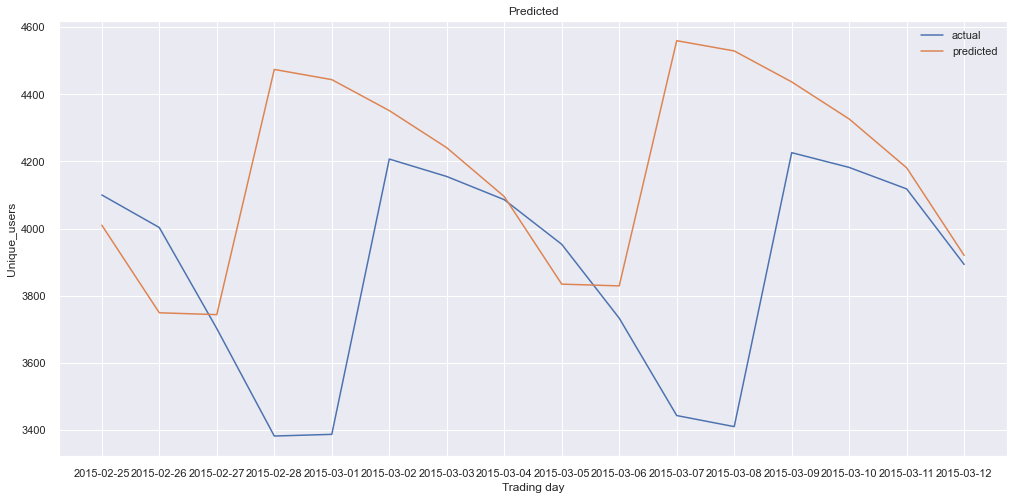

In [307]:
plt.figure(figsize=(17, 8))
plt.plot(comparison.actual, label='actual')
plt.plot(comparison.predicted, label='predicted')
plt.title('Predicted')
plt.ylabel('Unique_users')
plt.xlabel('Trading day')
plt.legend()
plt.show()

როგორც ვხედავთ, მიღებული შედეგი პატარა test ის შემთხვევაში საკმაოდ კარგია, ფორმა კარგად არის გამეორებული, მაგრამ თუ დიდ რიცხვებზე ვნახავთ, მოდელს არ შეუძლია გარდამტეხი ცვლილების გამოცნობა. მაგალითად, რომ ავიღოთ 100 სიგრძის ტესტ სეტი და მოდელი დანარჩენ მონაცემებზე დავატრენინგოთ, ვერ ამოიცნობს შობის შემდეგ მომხდარ გარდამტეხ ზრდას და მის მსგავს ცვლილებებს. ეს არის SARIMAX და მსგავსი ტიპის სტატისტიკური მოდელების უარყოფითი მხარე. მათ ყოველთვის ახასიათებთ underfit და აუცილებლად უნდა ქონდეთ ძალიან დიდი ზომის data, რომ შეეძლოთ რაღაც მკვეთრი ცვლილებების წინასწარმეტყველება.

მომხმარებლის შედეგიანობის წინასწარმეტყველება
-

ამ ამოცანაში ვეცდებით გამოვიცნოთ თუ რამდენად "შედეგიანი" იქნება კონკრეტული ადამიანისთვის შემდეგი დღეები. მოდი განვმარტოთ რას ნიშნავს "შედეგიანი". მიღებული ნუტრიოტებისა და აპლიკაციის დასახული ნუტრიოტების რაოდენობის საშუალებით პროგრამა ყოველდღე თვლის ქულას, რომელიც დავიმსახურეთ ამ დღეს. ანუ მაგალითად მე თუ დღეს ყველა ნუტრიოტთან მქონდა შედარებით დიდი აცდენა, ვიდრე გუშინ, დღეს აპლიკაცია ნაკლებ ქულას დამიწერს. ამით მომხმარებელს ექნება მეტი მოტივაცია სწორად მიყვეს დასახულ მიზანს და ასევე დაეხმარება მას იმაში, გახდეს სტაბილური და არ გამოტოვოს დღეები (დღის გამოტოვების შემთხვევაში ცხადია მას ქულა დააკლდება). 

აღსანიშნავია, რომ ამ ამოცანის დასახვასა და ჩამოყალიბებაში ძალიან დაგვეხმარა user clustering, ხოლო წინაში date clastering

In [308]:
# import dataset as pandas.DataFrame
data = pd.read_csv('mfp-diaries.tsv', sep='\t', header=0, names=['Person', 'Date', 'Input', 'Result'])

In [309]:
# აბრუნებს data[row[col]-ის მნიშვნელობას. jsn=True იმ შემთხვევაში თუ სვეტის ელემენტი json ფორმატში არის შენახული
# და ჭირდება დესერილიზაცია

def get_value(data, row, col, jsn):
    if jsn:
        return json.loads(data.iloc[row, col])
    else:
        return data.iloc[row, col]
    
def get_size(data, person):
    return data.loc[data.Person == person, ['Person']].shape[0]

ცხადია, ყველა იუზერისთვის არ შეგვეძლება დასახული ამოცანის ამოხსნა მათზე ინფორმაციის უქონლობის გამო. ამიტომ, გადავწყვიტეთ ავირჩიოთ ისეთი ადამიანები, ვისაც მინიმუმ 50 ჯერ მაინც აქვთ შეყვანილი აპლიკაციაში მონაცემები.

In [310]:
persons = data['Person'].unique()
dt = data.copy()
mp = {}
for person in persons:
    mp[person] = get_size(data, person)
rs = []
for i in data.index:
    rs.append(mp[get_value(data, i, 0, False)])
dt['cnt'] = rs
dt = dt.loc[dt.cnt >= 50, :]
data = dt
data.head()

,Person,Date,Input,Result,cnt
0,1,2014-09-15,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2430}...",173
1,1,2014-09-16,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 1862}...",173
2,1,2014-09-17,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2251}...",173
3,1,2014-09-18,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2001}...",173
4,1,2014-09-19,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2158}...",173


In [311]:
def calories_goal_distribution(data, row):
    result = get_value(data, row, 3, True)
    for i in range(len(result['total'])):
        if result['goal'][i]['name'] == 'Calories':
            return result['goal'][i]['value']
    return -1

In [312]:
def calories_total_distribution(data, row):
    result = get_value(data, row, 3, True)
    for i in range(len(result['total'])):
        if result['total'][i]['name'] == 'Calories':
            return result['total'][i]['value']
    return -1

In [313]:
def get_difference(data, row):
    result = get_value(data, row, 3, True)
    total_calories = 0
    goal_calories = 0
    total_sugar = 0
    goal_sugar = 0
    for i in range(len(result['total'])):
        if result['total'][i]['name'] == 'Sugar':
            total_sugar = result['total'][i]['value']
        if result['total'][i]['name'] == 'Calories':
            total_calories = result['total'][i]['value']
        if result['goal'][i]['name'] == 'Calories':
            goal_calories = result['goal'][i]['value']
        if result['goal'][i]['name'] == 'Sugar':
            goal_sugar = result['goal'][i]['value']
    return abs(goal_calories - total_calories), abs(goal_sugar - total_sugar)

In [314]:
def get_date_index(dates, date):
    for i in range(len(dates)):
        if dates[i] == date:
            return i
    return -1

In [315]:
def dates_contains_date(dates, date):
    for cur_date in dates:
        if cur_date == date:
            return True
    return False

In [316]:
remaining_persons = data['Person'].to_numpy()
person_id = remaining_persons[5];
person_dt = data.loc[data.Person == person_id, :].copy()
person_dates = person_dt['Date'].to_numpy()
dates = data['Date'].unique()

In [318]:
import datetime
new_dates = []
for date in dates:
    x = datetime.datetime(int(date[0:4]), int(date[5:7]), int(date[8:10]))
    new_dates.append(x)
dates = new_dates
dates.sort()
new_person_dates = []
for date in person_dates:
    x = datetime.datetime(int(date[0:4]), int(date[5:7]), int(date[8:10]))
    new_person_dates.append(x)
person_dates = new_person_dates
person_dates.sort()

ამ ამოცანაში ჩვენთვის ერთ-ერთი ყველაზე რთული ნაწილი არის განვსაზღვროთ ის ქულა, რომელიც მომხმარებელს ეკუთნის. ასეთი რაღაცის დასადგენად საჭიროა ნუტრიოტებში კარგად გარკვეული ჯგუფის მუშაობა და დადგენა შესაბამისი ფორმულისა და კოეფიციენტების. ჩვენ არ გვინდოდა ეს ფორმულა ჰაერიდან მოგვეტანა და ისე ჩაგვეტარებინა კვლევა, ამიტომ გავაკეთეთ რაღაც research-ები, ვკითხეთ აზრი ამ საკითხში გამოცდილ ადამიანებს და რჩევად მივიღეთ, რომ ყველაზე მარტივი, რაც შეგვიძლია გავაკეთოთ არის ის, რომ დავაკვირდეთ და დიდი ყურადღება მივაქციოთ კალორიებსა და შაქარს, კონკრეტული კოეფიციენტებით. 
მთლიანად ვეყრდნობით აპლიკაციის დასახულ გოლ-ს და ნებისმიერ უზუსტობაზე შესაბამის ზომას ვიღებთ. შაქარს ვანიჭებთ 0.3 კოეფიციენტს, ხოლო კალორიებს 0.7-ს. მათ შესაბამის აცდენებს კი ვასკალირებთ, ვამრავლებთ მოცემულ კოეფიციენტებზე, ვჯამავთ და ვაქცევთ [0,100] შუალედში. ეს იქნება ჩვენი საბოლოო ქულა მოცემული დღისათვის.
მაგრამ, ასევე არ გვინდოდა ერთი ჩავარდნის გამო მაგალითად ძალიან ქვევით ჩემოსულიყო ქულები და ძალიან დიდი გავლენა ექონია მომავლისათვის. ამიტომ ქულის დადგენაც გავხადეთ რეკურენტული beta კოეფიციენტი -> beta * currDay + (1 - beta) * prevDay. ამით იჭრება გამოტოვებული დღეების პრობლემაც. 

In [319]:
beta = 0.2
lst = []
lst2 = []
for i in person_dt.index:
    lst.append(get_difference(data, i)[0])
    lst2.append(get_difference(data, i)[1])
mx = max(lst)
mx2 = max(lst2)
if mx == 0:
    mx = 1
if mx2 == 0:
    mx2 = 1
for i in range(len(lst)):
    lst[i] /= mx 
    lst[i] = lst[i] * 0.7 * 100
    lst2[i] /= mx2 
    lst2[i] = lst2[i] * 0.3 * 100
    
results = []
lsts_index = 0
frm = get_date_index(dates, person_dates[0])
to = get_date_index(dates, person_dates[len(person_dates) - 1])
missed_days = 0
for i in range(frm, to+1):
    date = dates[i]
    if not dates_contains_date(person_dates, date):
        missed_days += 1
        results.append(results[len(results) - 1] * beta)
    else:
        if len(results) == 0:
            results.append((1 - beta) * (100 - lst[lsts_index] - lst2[lsts_index]))
        else:
            results.append(results[len(results) - 1] * (1 - beta) + beta * (100 - lst[lsts_index] - lst2[lsts_index]))
        lsts_index += 1

In [320]:
%matplotlib inline

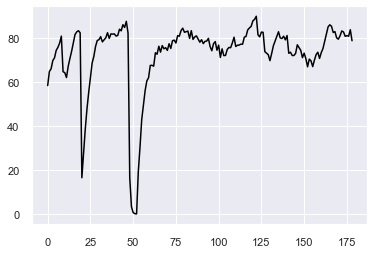

In [321]:
plt.plot(results, color='black')
plt.show()

ARIMA
-

ამ შემთხვევაში გამოვიყენებთ ARIMA მოდელს, რადგან სეზონურობის ნიშანწყალი არ ჩანს და არც სხვა იუზერებისთვის იქნება სეზონური გრაფიკი, უფრო სწორად ძალიან ცოტაა შანსი, რომ რომელიმე იუზერს სეზონური გრაფიკი აღმოაჩნდეს, რადგან ეს მონაცემები რეალური აპლიკაციიდანაა აღებული და ნაკლებ სავარაუდოა, რომ რომელიმე ადამიანის ცხოვრების სტილი იმდენად განმეორებადი იყოს, რომ 50 დღის განმავლობაში სეზონური ყოფაქცევა დაფიქსირდეს.

In [322]:
person_dt = pd.DataFrame({"Function" : results})

In [323]:
%matplotlib inline

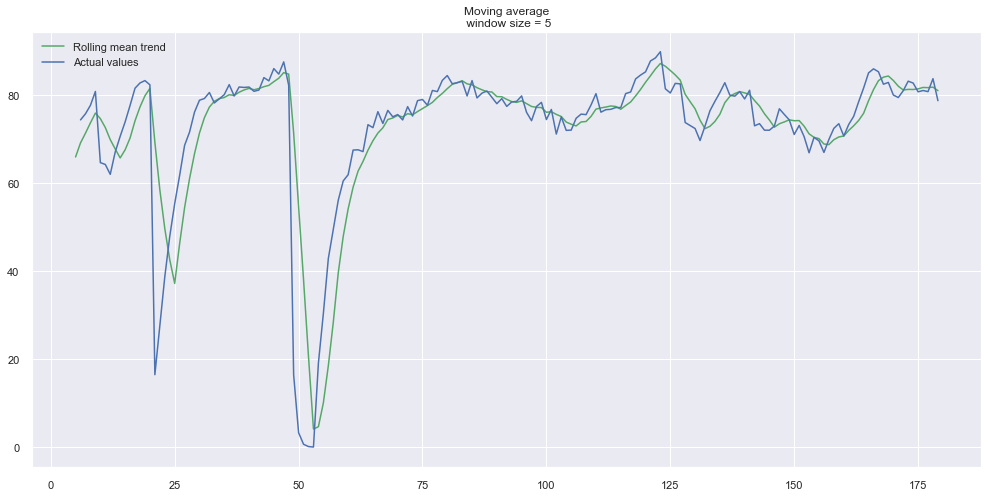

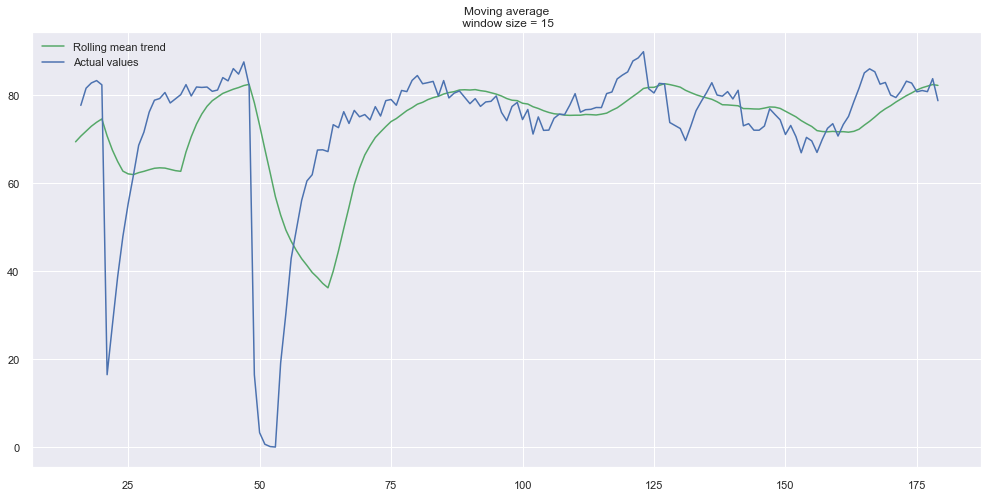

In [324]:
def plot_moving_average(series, window, length, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    arr = [i for i in range(1, length + 1)]
    plt.plot(arr, rolling_mean, 'g', label='Rolling mean trend')
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(arr,upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(arr, lower_bound, 'r--')          
    plt.plot(arr[window:], series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 5 days (by week)
plot_moving_average(person_dt.Function, 5, len(results))
#Smooth by the previous month (30 days)
plot_moving_average(person_dt.Function, 15, len(results))

გავაკეთოთ ისევ დიკი ფულერის ტესტი. ძირითად შემთხვევებში, რამდენად გასაკვირიც არ უნდა იყოს, ეს ტესტი 0-თან ახლო მნიშნელობებს აჩვენებს, თუმცა სტაციონალურს არაფრით არ გავს წესით, რადგან საშუალოს და ვარიაციის მნიშნელობები მარტივი შესამჩნევია, რომ ცვალებადია საკმაოდ. ამიტომ წესით ეს მოდელი არ გამოდგება იმისთვის, რომ კარგი შედეგები მივიღოთ, თუმცა მაინც ვცადოთ.

In [325]:
%matplotlib inline

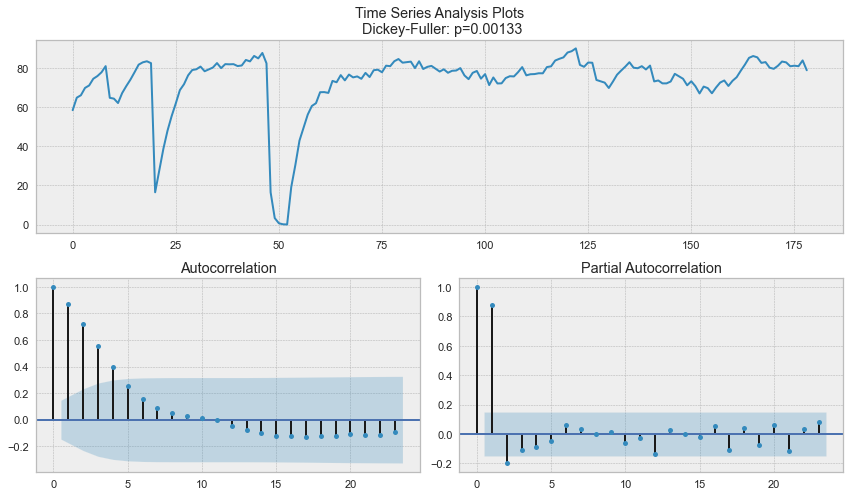

In [326]:
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
    return p_value 
        
p_value = tsplot(person_dt.Function, lags=None)

if p_value > 0.1:  
    # function()
    data_diff = person_dt.Function - person_dt.Function.shift(1)
    tsplot(data_diff[10:], lags=30)

აქ ხდება ოპტიმალური პარამეტრების არჩევა, ეს პროცესი უკვე გავიარეთ წინა ნაწილში.

In [327]:
from statsmodels.tsa.arima.model import ARIMA
ps = range(0, 5)
qs = range(0, 5)
d = 1
parameters = product(ps, qs)

In [328]:
def optimize_ARIMA(parameters_list, d):
    results = []
    best_aic = float('inf')
    for param in tqdm_notebook(parameters_list):
        model = ARIMA(person_dt.Function, order=(param[0], d, param[1])).fit()
        aic = model.aic
    
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
    results = sorted(results, key=lambda x: x[1])
    
    return results[0][0]

In [329]:
p, q = optimize_ARIMA(list(parameters), d)

best_model = ARIMA(person_dt.Function, order=(p, d, q)).fit()

print(best_model.summary())

<ipython-input-328-a77b3cc36e53>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameters_list):


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/mod


                               SARIMAX Results                                
Dep. Variable:               Function   No. Observations:                  179
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -614.406
Date:                Sat, 20 Feb 2021   AIC                           1238.813
Time:                        19:59:01   BIC                           1254.722
Sample:                             0   HQIC                          1245.264
                                - 179                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5584      0.387      4.032      0.000       0.801       2.316
ar.L2         -0.6475      0.357     -1.812      0.070      -1.348       0.053
ma.L1         -1.5279      0.404     -3.779      0.

In [330]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

s = 15

values = (best_model.predict(start=person_dt.Function.shape[0], end=person_dt.Function.shape[0] + s)).to_list()
print(mean_absolute_percentage_error(person_dt.Function[s+d:], best_model.fittedvalues[s+d:]))

247.94545746757822


In [331]:
comparison = pd.DataFrame({'actual': person_dt.Function[-s - 1:],
                          'predicted': values})

In [332]:
%matplotlib inline

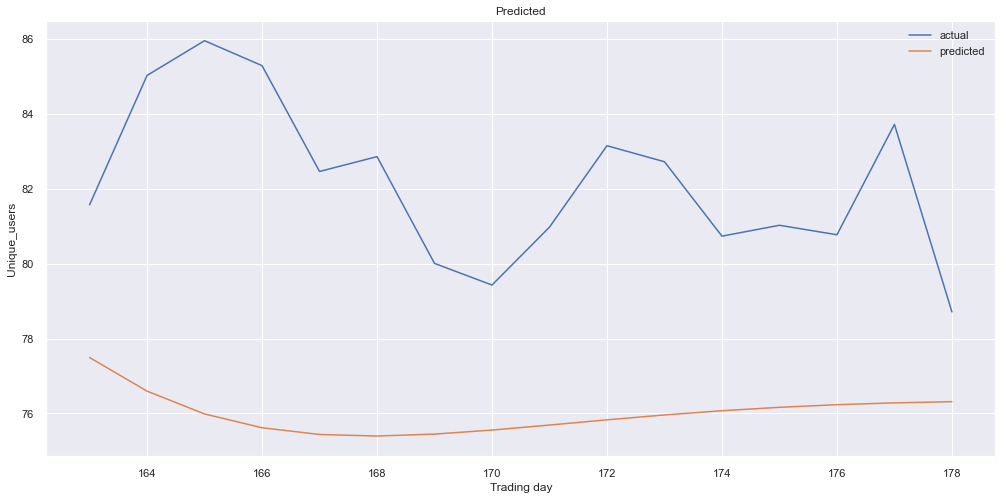

In [333]:
plt.figure(figsize=(17, 8))
plt.plot(comparison.actual, label='actual')
plt.plot(comparison.predicted, label='predicted')
plt.title('Predicted')
plt.ylabel('Unique_users')
plt.xlabel('Trading day')
plt.legend()
plt.show()

როგორც ვივარაუდეთ, ფრედიქშენი არც ისე საამაყო გამოდგა. ამ ტიპის ფრედიქშენის გამოყენება ხდება კონკრეტულ იუზერებზე, ამიტომ თუ მაგალითად საჭიროა ყველა იუზერისთვის მსგავსი ინფორმაციის ამოღება, მოგვიწევს ამდენივე მოდელის შექმნა და გაშვება, რაც არც თუ ისე სახარბიელოა ეფექტურობის მხრივ. თუ გავითვალისწინებთ იმას, რომ ARIMA სტატისტიკური მოდელია და მუშაობის დროს და რესურსს ბევრს არ ხარჯავს, მისი გამოყენება მიზანშეწონილი უნდა იყოს, თუმცა, ვნახეთ, რომ საკმაოდ ცუდი შედეგი მოგვცა და დიდად გამოყენება არ შეიძლება. ამის გამომწვევი მიზეზი ის არის, რომ ეს stock-ები საკმაოდ რთული და არაპროგნოზირებადი ფორმისაა და შესაბამისად ბევრი მონაცემი სჭირდება, რომ მისაღებ შედეგზე გავიდეთ. წინა შემთხვევაშიც არ იყო ბოლომდე დამაკმაყოფილებელი შედეგი და ახლა მითუმეტეს.
როგორც ვთქვით, მოდელის მუშაობის დროის გაზრდა საკმაოდ შენელებას გამოიწვევს პროცესის, თუმცა ARIMA მოდელის შეცვლა აუცილებლად მოგვიწევს, რადგან მისი ეფექტურობა ძალიან ცოტაა. ვცადოთ რეკურენტური ნეირონული ქსელების გამოყენება, კონკრეტულად GRU მოდელის. როგორც ვიცით, შედეგის თვალსაზრისით LSTM მოდელი GRU ზე გაცილებით უკეთესია, მაგრამ აქ გვაქვს tradeoff მოდელის სისწრაფესა და ეფექტურობას შორის, ამიტომ GRU-ს არჩევა მოგვიწია.

In [334]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU

დავყოთ მონაცემები train-test ად, დავატრენინგოთ ნეირონული ქსელი ტრეინზე და ვნახოთ რა შედეგს მოგვცემს.

In [335]:
def train_test_split(data):
    X = []
    y = []
    for i in range(len(data) - 7):
        X.append(data[i:i+7])
        y.append(data[i+7])
    X = np.asarray(X)
    y = np.asarray(y)
    train_size = round(len(X) * 0.8)
    
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    return X_train, X_test, y_train, y_test

In [336]:
X_train, X_test, y_train, y_test = train_test_split(person_dt.Function.values)
X_train= X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [337]:
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')
gru_model.summary()
gru_model.fit(X_train, y_train, epochs=50, verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 50)                8850      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 8,901
Trainable params: 8,901
Non-trainable params: 0
_________________________________________________________________


In [338]:
%matplotlib inline

2/2 [==============================] - 0s 5ms/step


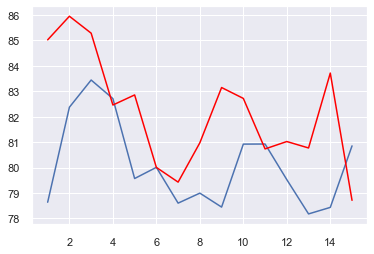

In [339]:
prediction = gru_model.predict(X_test, verbose=1)
plt.plot([i for i in range(1, s+1)], prediction[-s:])
plt.plot([i for i in range(1, s+1)], y_test[-s:], color='red')

შედეგი საკმაოდ მიმზიდველად გამოიყურება. ეფექტურობა საკმაოდ გაუმჯობესებულია, თუმცა GRU რახან ნეირონული ქსელია, მაინც საკმაო დროის რესურსს საჭიროებს. ამ კონკრეტულ შემთხვევაში დასჭირდა 2 მილიწამი. ეს კონრეტული მონაცემები რაც ავიღეთ, მაქსიმალურთან საკმაოდ ახლოსაა, და თუ გავითვალისწინებთ იმას, რომ იუზერების რაოდენობა დაახლოებით ათიათასია, მაშინ შეგვიძლია ვთქვათ, რომ ყველა იუზერსითვის ცალკე მოდელის შექმნა და გაშვებბის პროცესი დაახლოებით 20 წამს წაიღებს. ეს არც თუ ისე ცუდი შედეგია, თუმცა გაუმჯობესებაც შეიძლება (რა თქმა უნდა სიზუსტის ხარჯზე) gru ლეიერის პარამეტრების რაოდენობის შემცირებით.
-